In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Cluster_Photometry.csv')

star_ids = data['star'].unique()
altitudes = data['alt_deg'].unique()
magnitudes = data['inst_mag'].unique()
del_mags = data['del_mag'].unique()

print("Star IDs:", star_ids.tolist())
print("Altitudes:", altitudes.tolist())
print("Magnitudes:", magnitudes.tolist())
print("Delta Magnitudes:", del_mags.tolist())

Star IDs: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']
Altitudes: [35.94584186999935, 35.95575379166827, 35.96974741789223, 35.98418134870365, 35.975608906022565, 35.993996348789985, 36.0065606319981, 36.01547213391924, 36.01724053021132, 35.975412354265764, 35.93600500438923, 35.98903809958761, 35.99924216611329, 35.99917883376903, 35.97575656775573, 36.01479355349559, 35.98519906622943, 35.94574158192004, 35.94128447588209, 35.99211000580482, 36.1272818681545, 36.137184516777694, 36.15115432282408, 36.16555225069875, 36.15694197428984, 36.17541316013956, 36.18804523103187, 36.19703317458358, 36.198773014868806, 36.15678258826678, 36.11735524318985, 36.17052719196847, 36.1807884736834, 36.18047875733397, 36.15700773923417, 36.19621084488065, 36.16661012393771, 36.12729666966198, 36.12277111973004, 36.17331453018766, 36.31180800309922, 36.32170115764679, 36.335646646847934, 36.35000786260616, 36.34135915496904, 36.35991541013213, 

In [176]:
class Star:
    def __init__(self, star_id):
        self.star_id = star_id
        self.altitudes = {'u' : [], 'g': [], 'r': [], 'i': [], 'z': []}
        self.magnitudes = {'u' : [], 'g': [], 'r': [], 'i': [], 'z': []}
        self.del_mags = {'u' : [], 'g': [], 'r': [], 'i': [], 'z': []}

    def add_observation(self, band ,altitude, magnitude, del_mag):
        self.altitudes[band].append(altitude)
        self.magnitudes[band].append(magnitude)
        self.del_mags[band].append(del_mag)

    def generate_air_mass(self):
        self.air_masses = {band: [1/np.sin(np.radians(alt)) for alt in alts] for band, alts in self.altitudes.items()}

stars = []
for _, row in data.iterrows():
    if row['star'] not in [star.star_id for star in stars]:
        star = Star(row['star'])
        stars.append(star)
    
    star = next(star for star in stars if star.star_id == row['star'])
    star.add_observation(row['filter'], float(row['alt_deg']), float(row['inst_mag']), float(row['del_mag']))
for star in stars:
    star.generate_air_mass()

# for star in stars:
#     print(f"Star ID: {star.star_id}")
#     print(f"Altitudes: {star.altitudes}")
#     print(f"Air Masses: {star.air_masses}")
#     print(f"Magnitudes: {star.magnitudes}")
#     print(f"Delta Magnitudes: {star.del_mags}")
#     print()

print(stars[0].altitudes)
print(stars[0].air_masses)

{'u': [35.50311705564894, 40.0755033746788, 45.08860305503432, 57.243687353669145, 67.37117286853889, 76.5775392400891, 68.3745938923925, 29.4198436326772], 'g': [35.767483635970784, 40.31939420533276, 45.335071541514445, 57.50929034467454, 67.63029910519596, 68.6308761833421, 76.76225833261329, 29.65461021914164], 'r': [35.94584186999935, 40.50015136522512, 45.51770404359996, 57.69545403740342, 67.80460405901526, 68.82327641030227, 76.90796092332167, 29.82867740522141], 'i': [36.1272818681545, 40.68099020583743, 45.703434312916166, 57.87851182598559, 67.98148419101017, 68.99803627197782, 77.03691327452019, 30.005789406135683], 'z': [36.31180800309922, 40.86492572860562, 45.88921773696353, 58.06456307648536, 68.15802223771311, 69.17239326342865, 77.17613159264148, 30.183045253741863]}
{'u': [1.7219194898735182, 1.5532857843977788, 1.4120316646091253, 1.1890897610684867, 1.0834039572632648, 1.0280821090793681, 1.0757162681948267, 2.0358079999293457], 'g': [1.7108719250842295, 1.54548063

In [177]:
def Least_Squares_Fit(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    m_err = np.std(y - (m*x + c))
    r_2 = np.corrcoef(x, y)[0, 1] ** 2
    return m, c, m_err, r_2

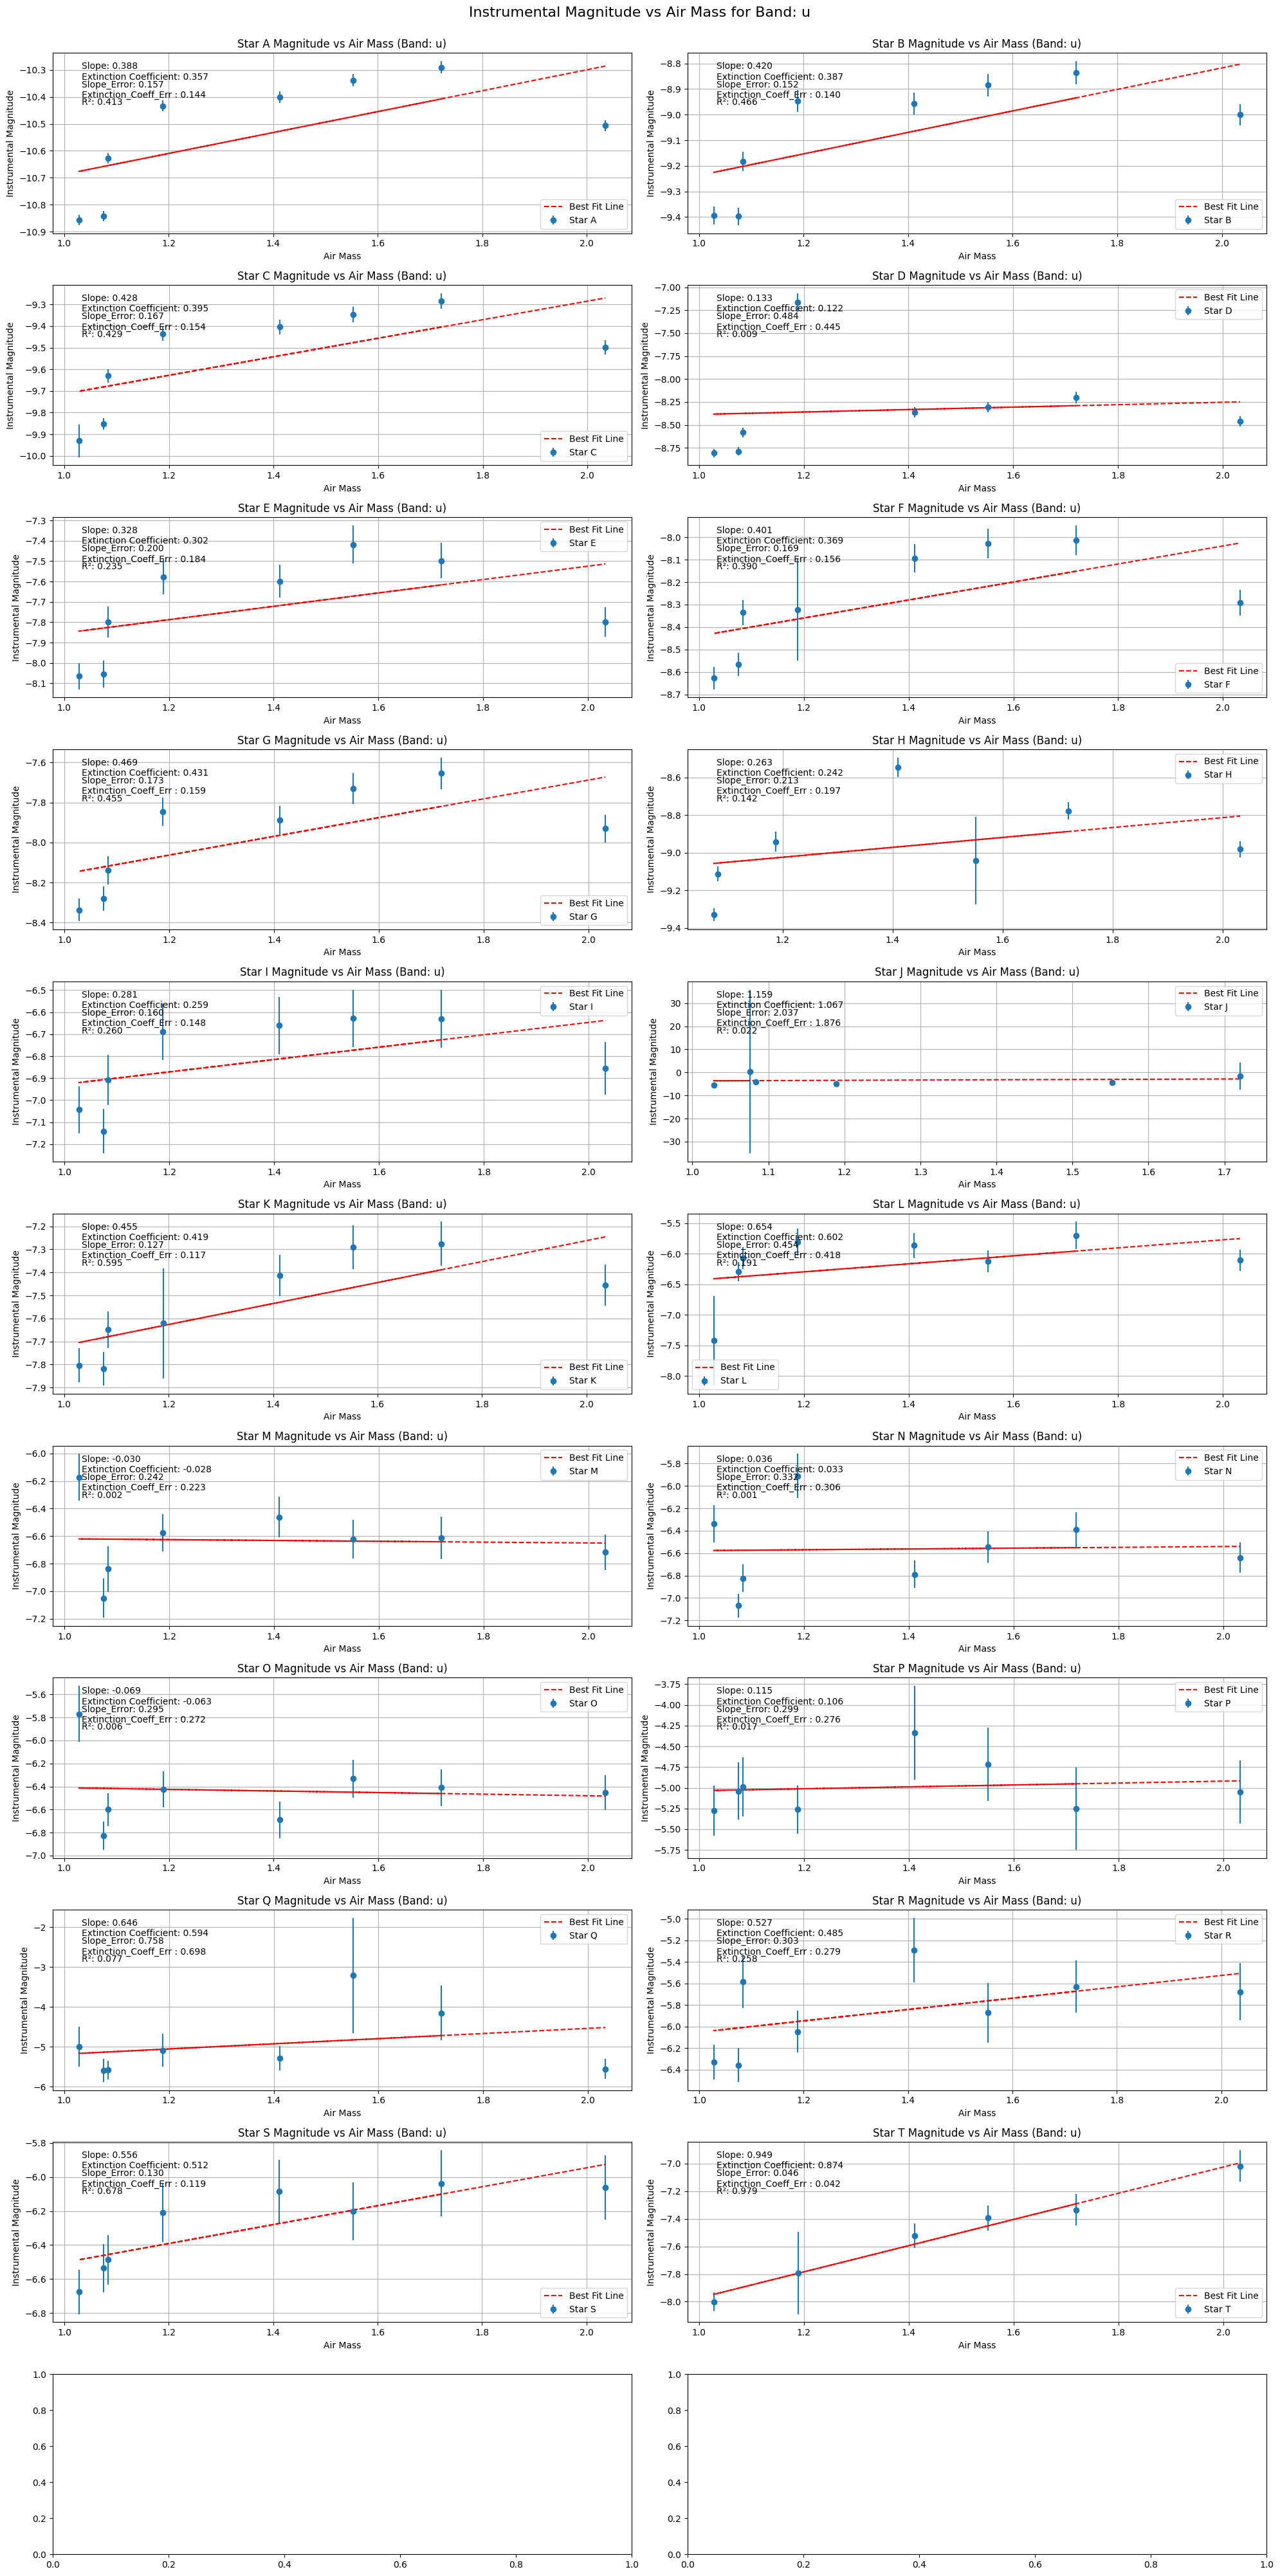

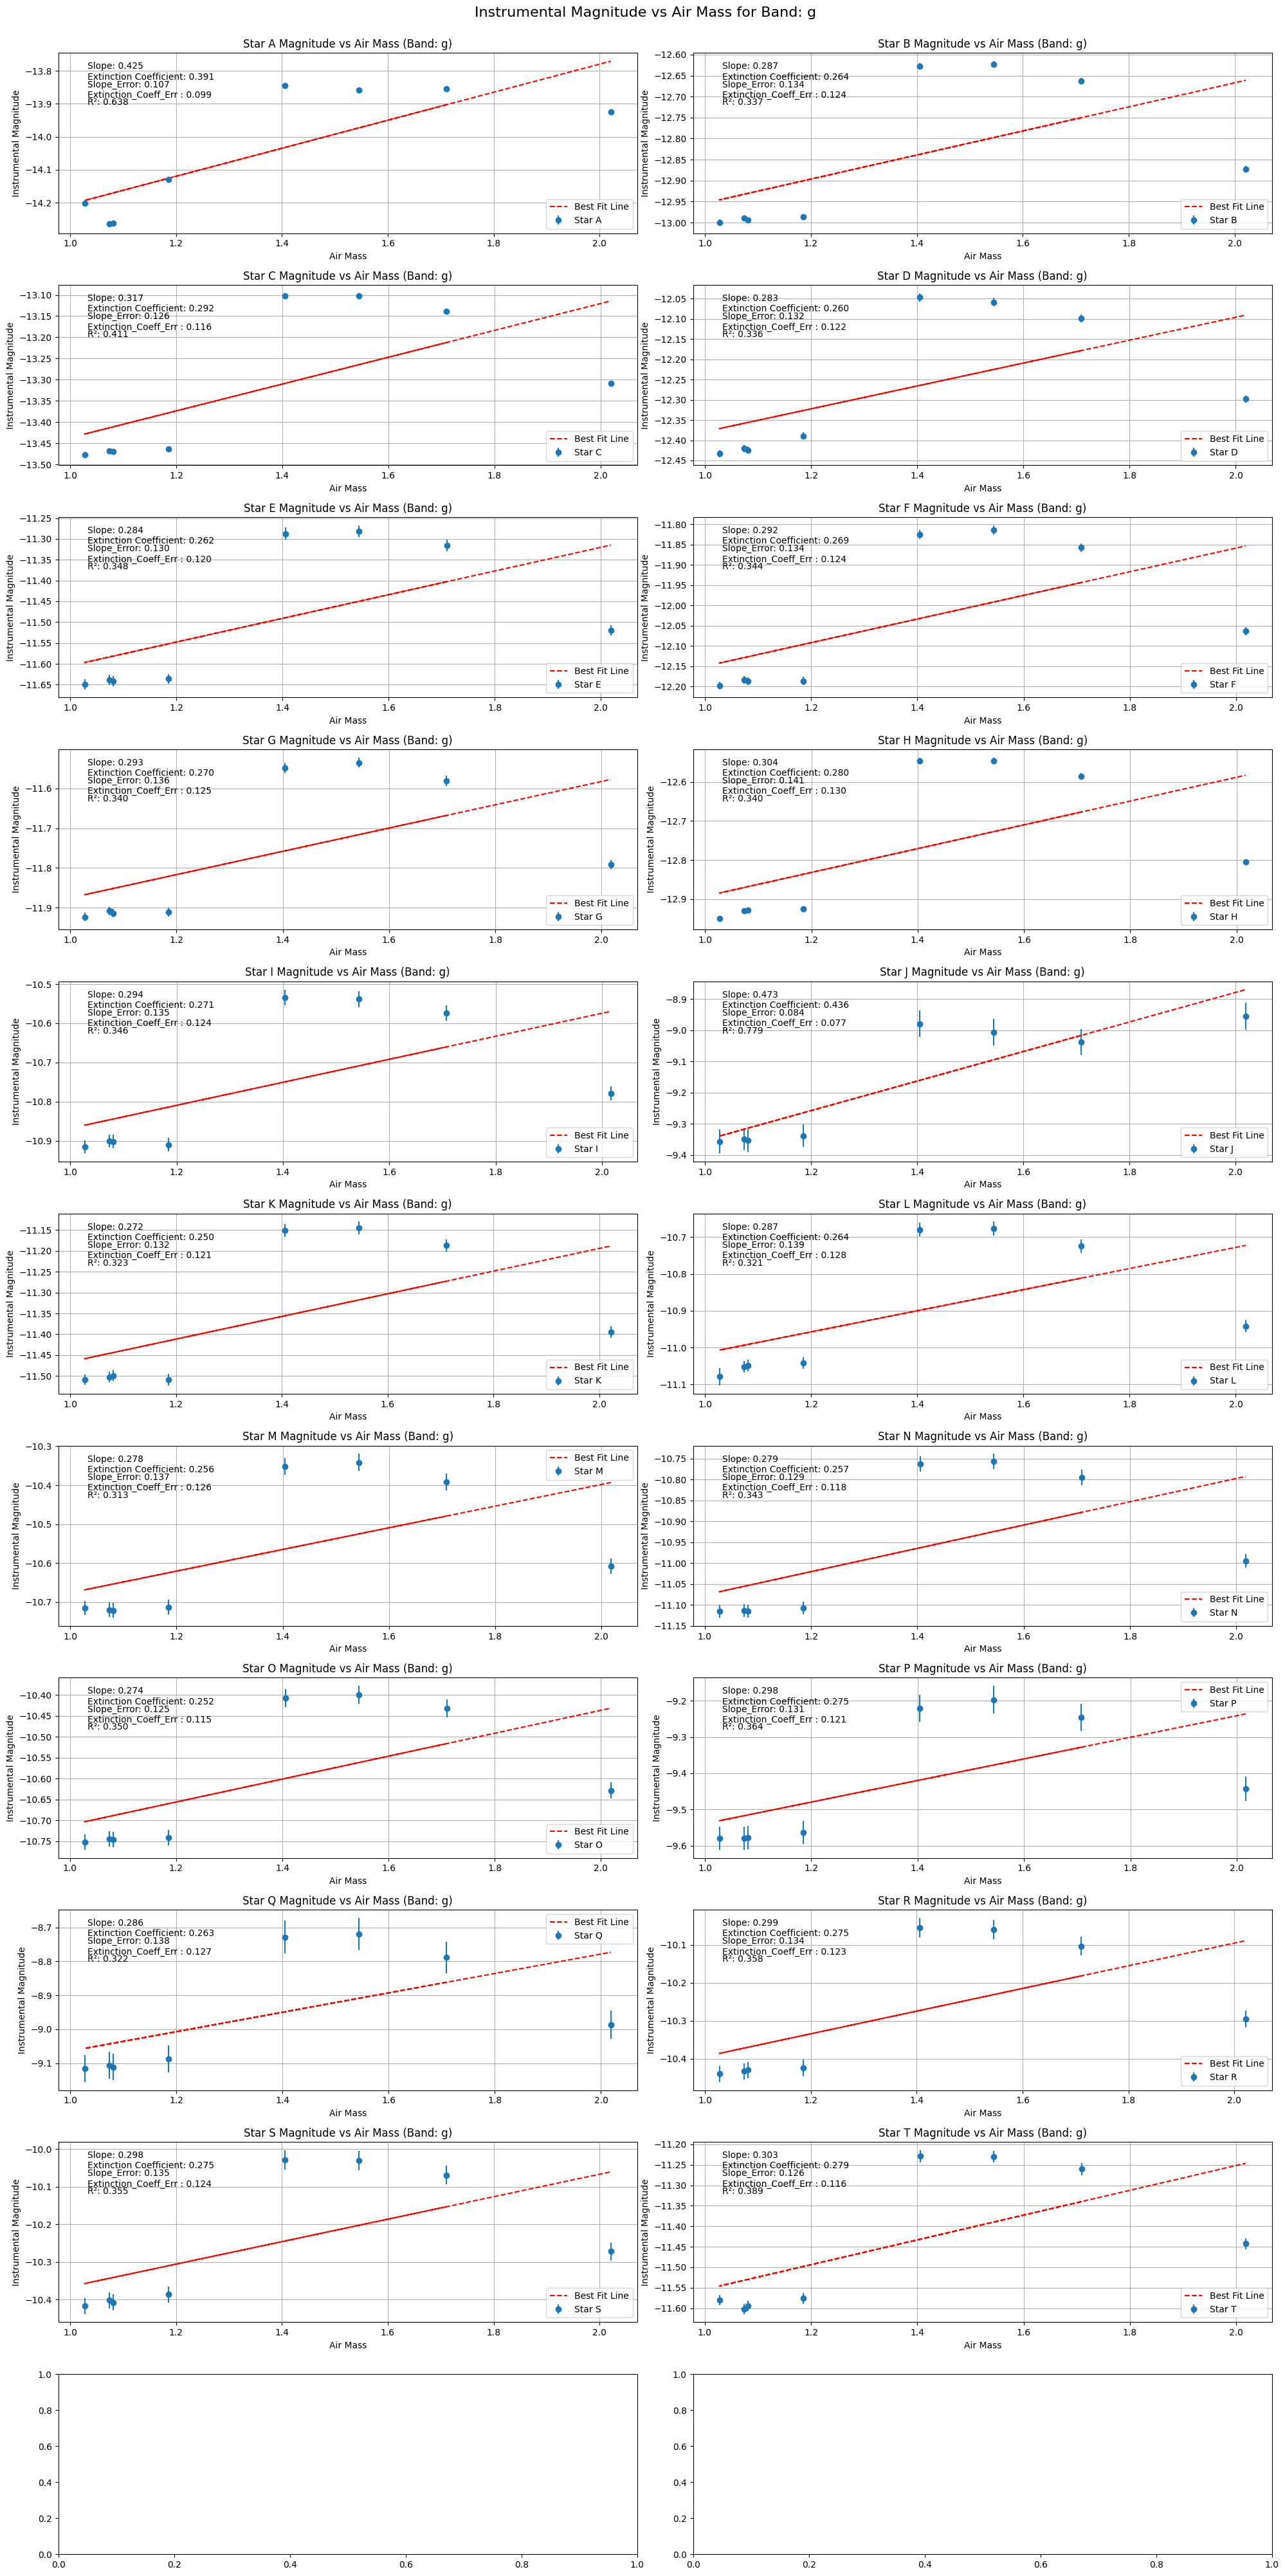

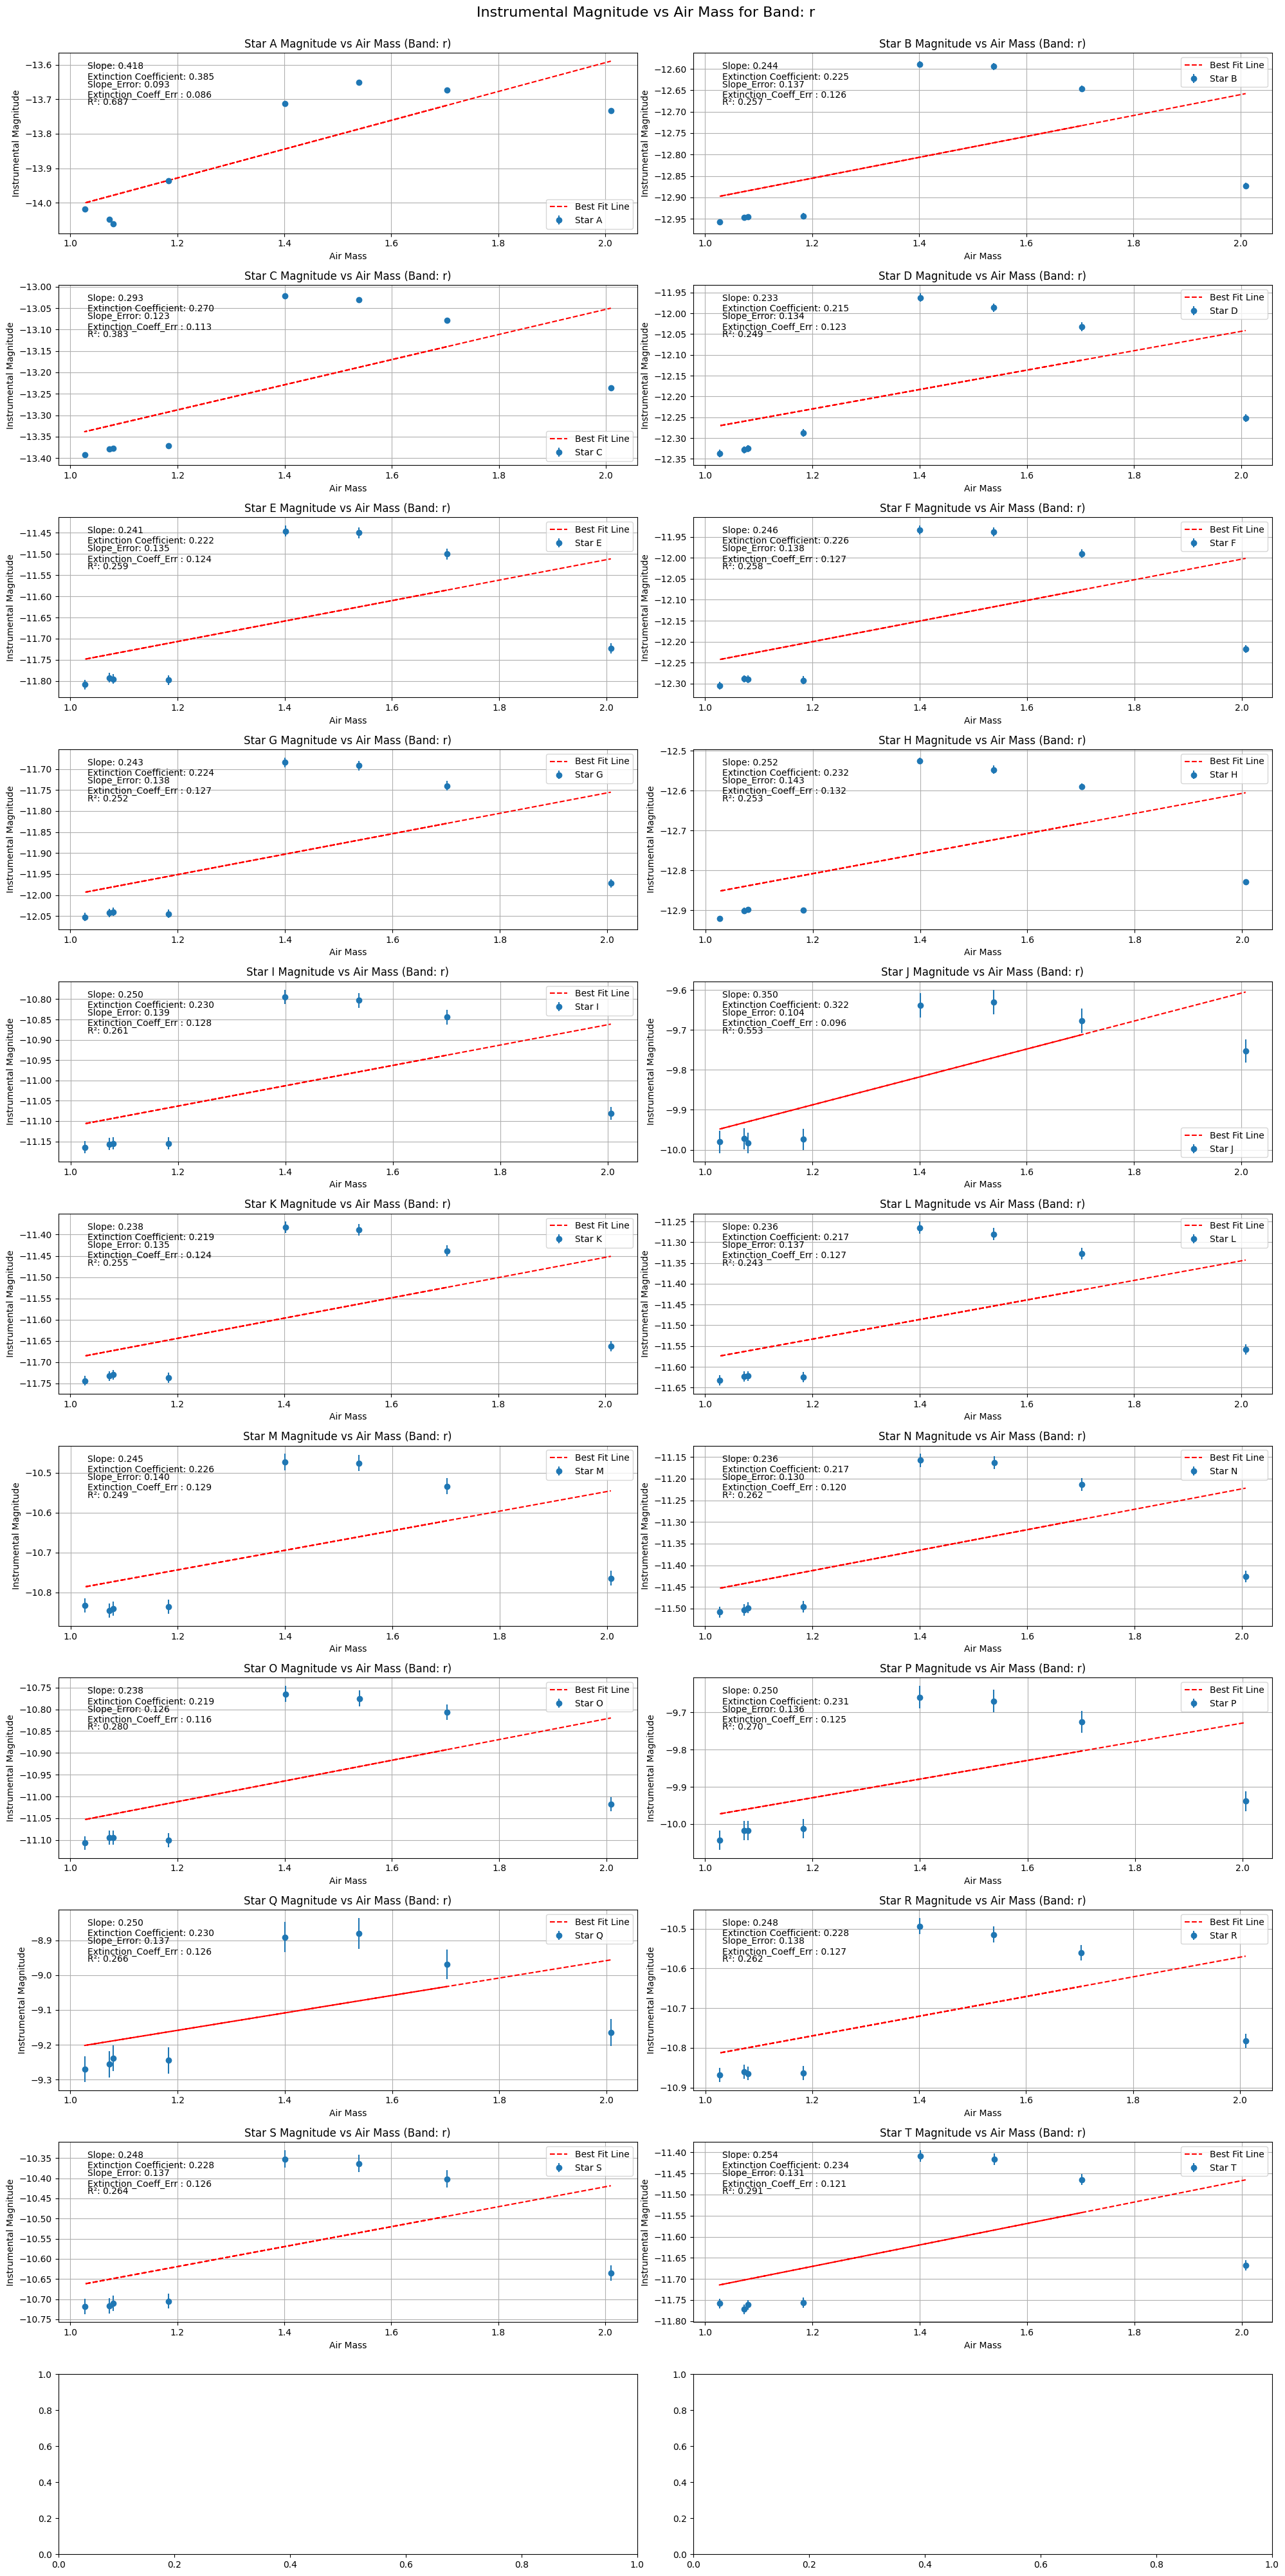

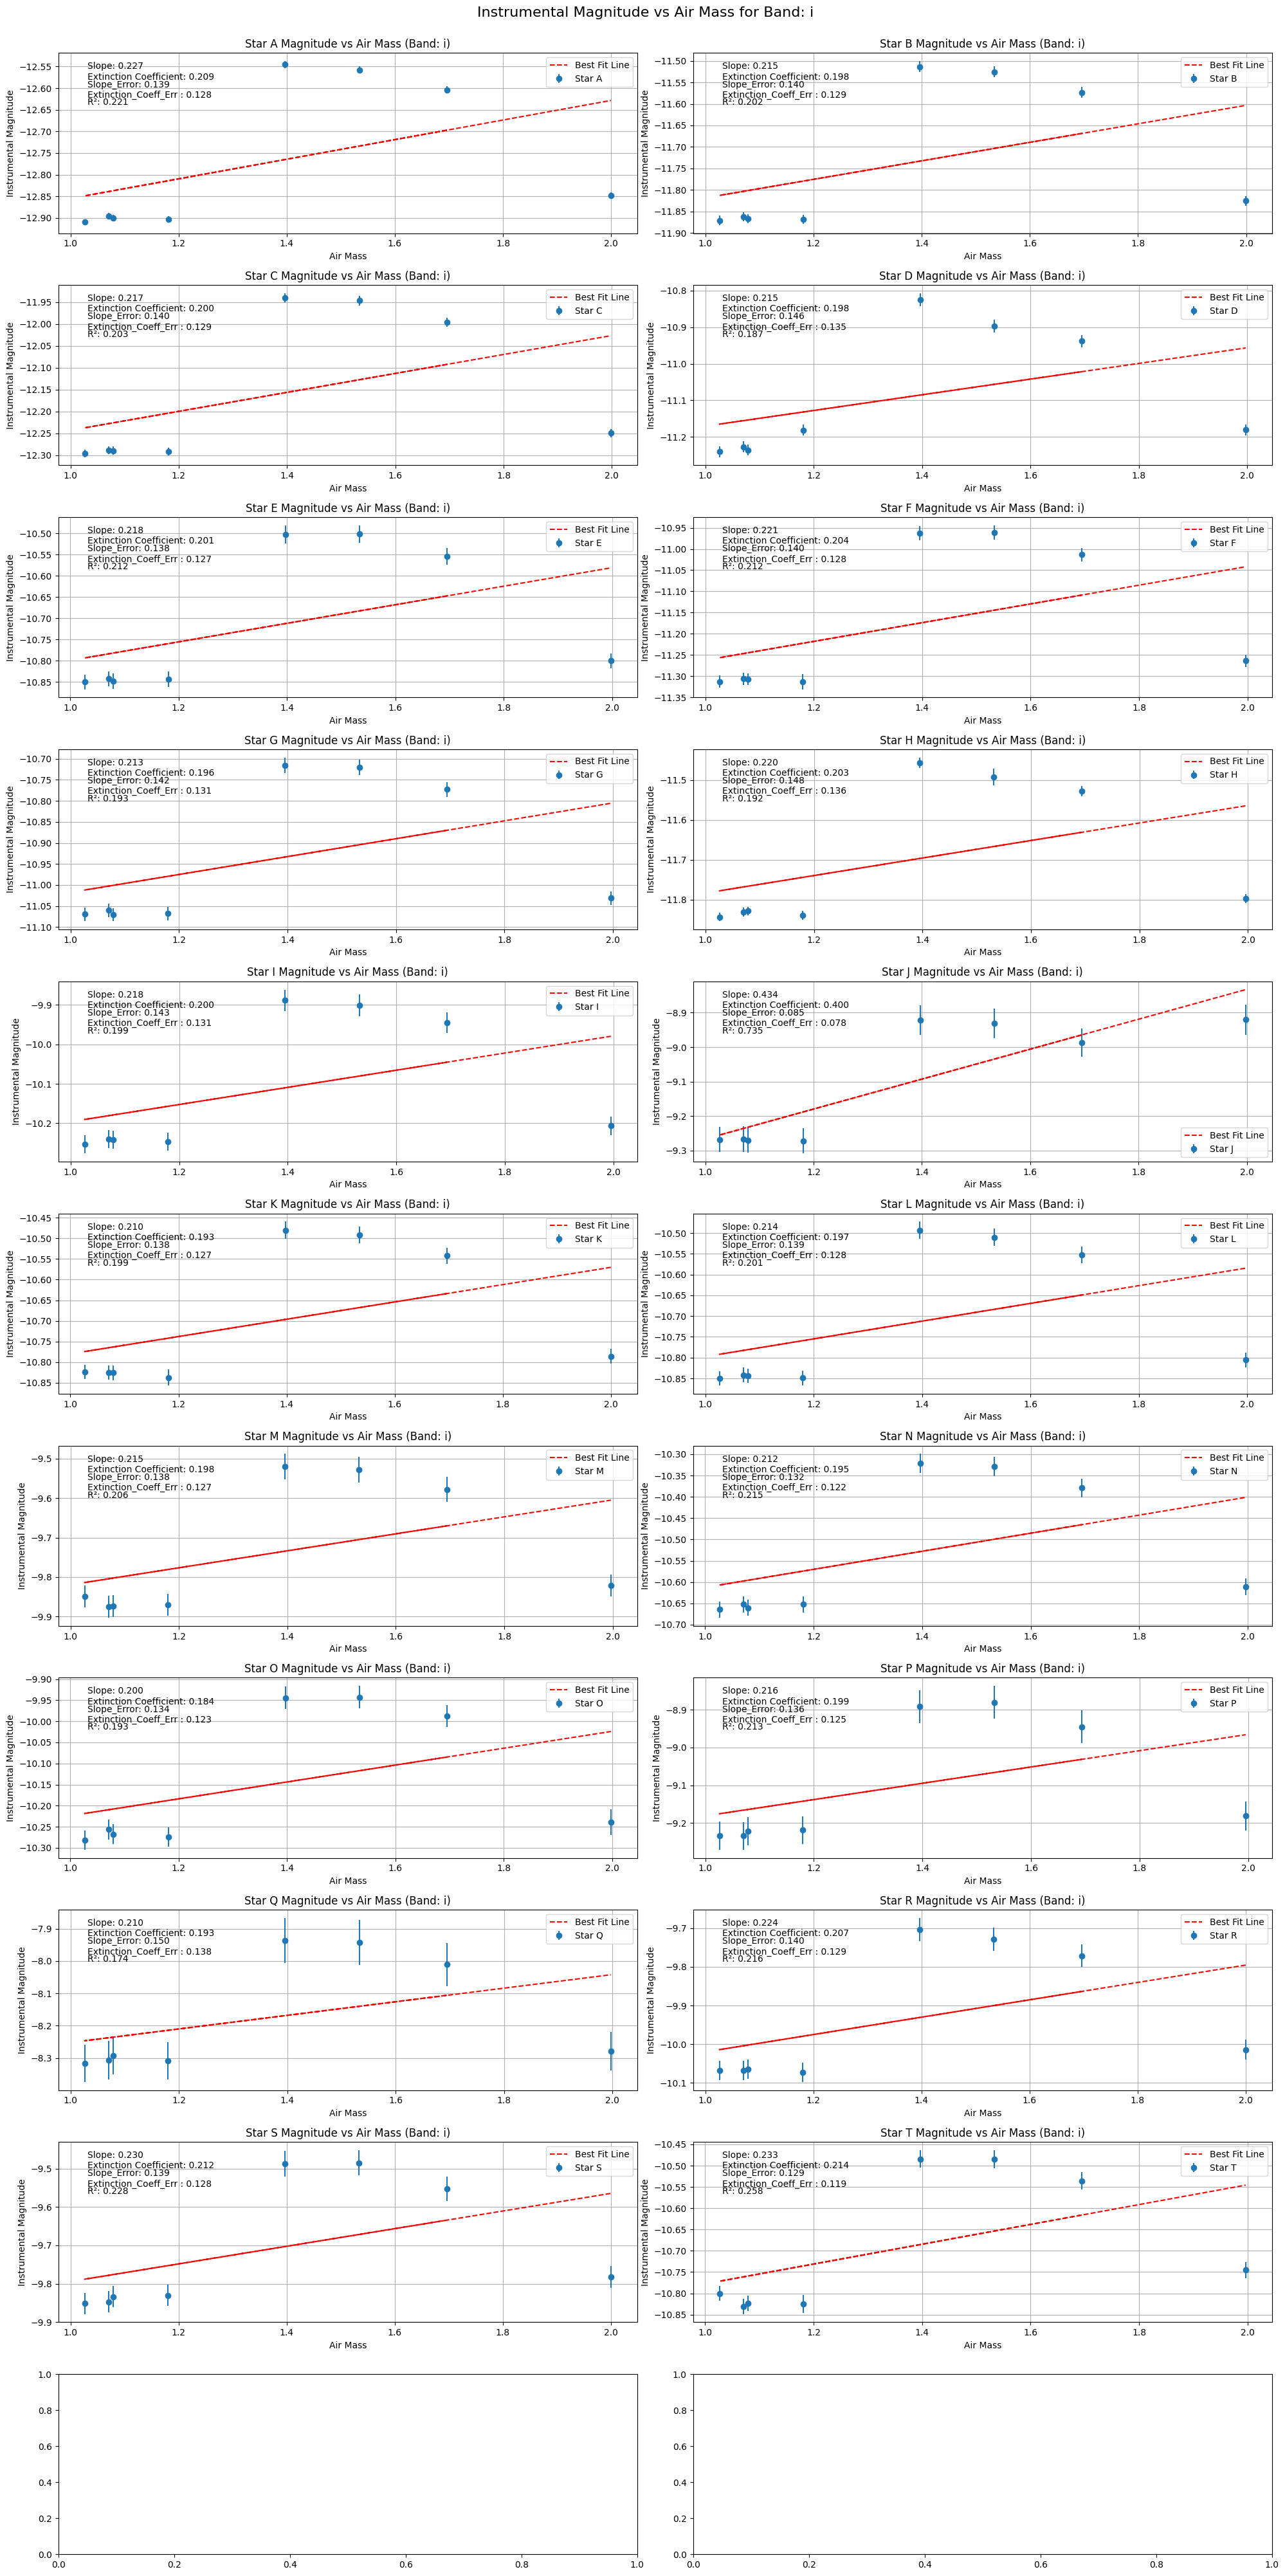

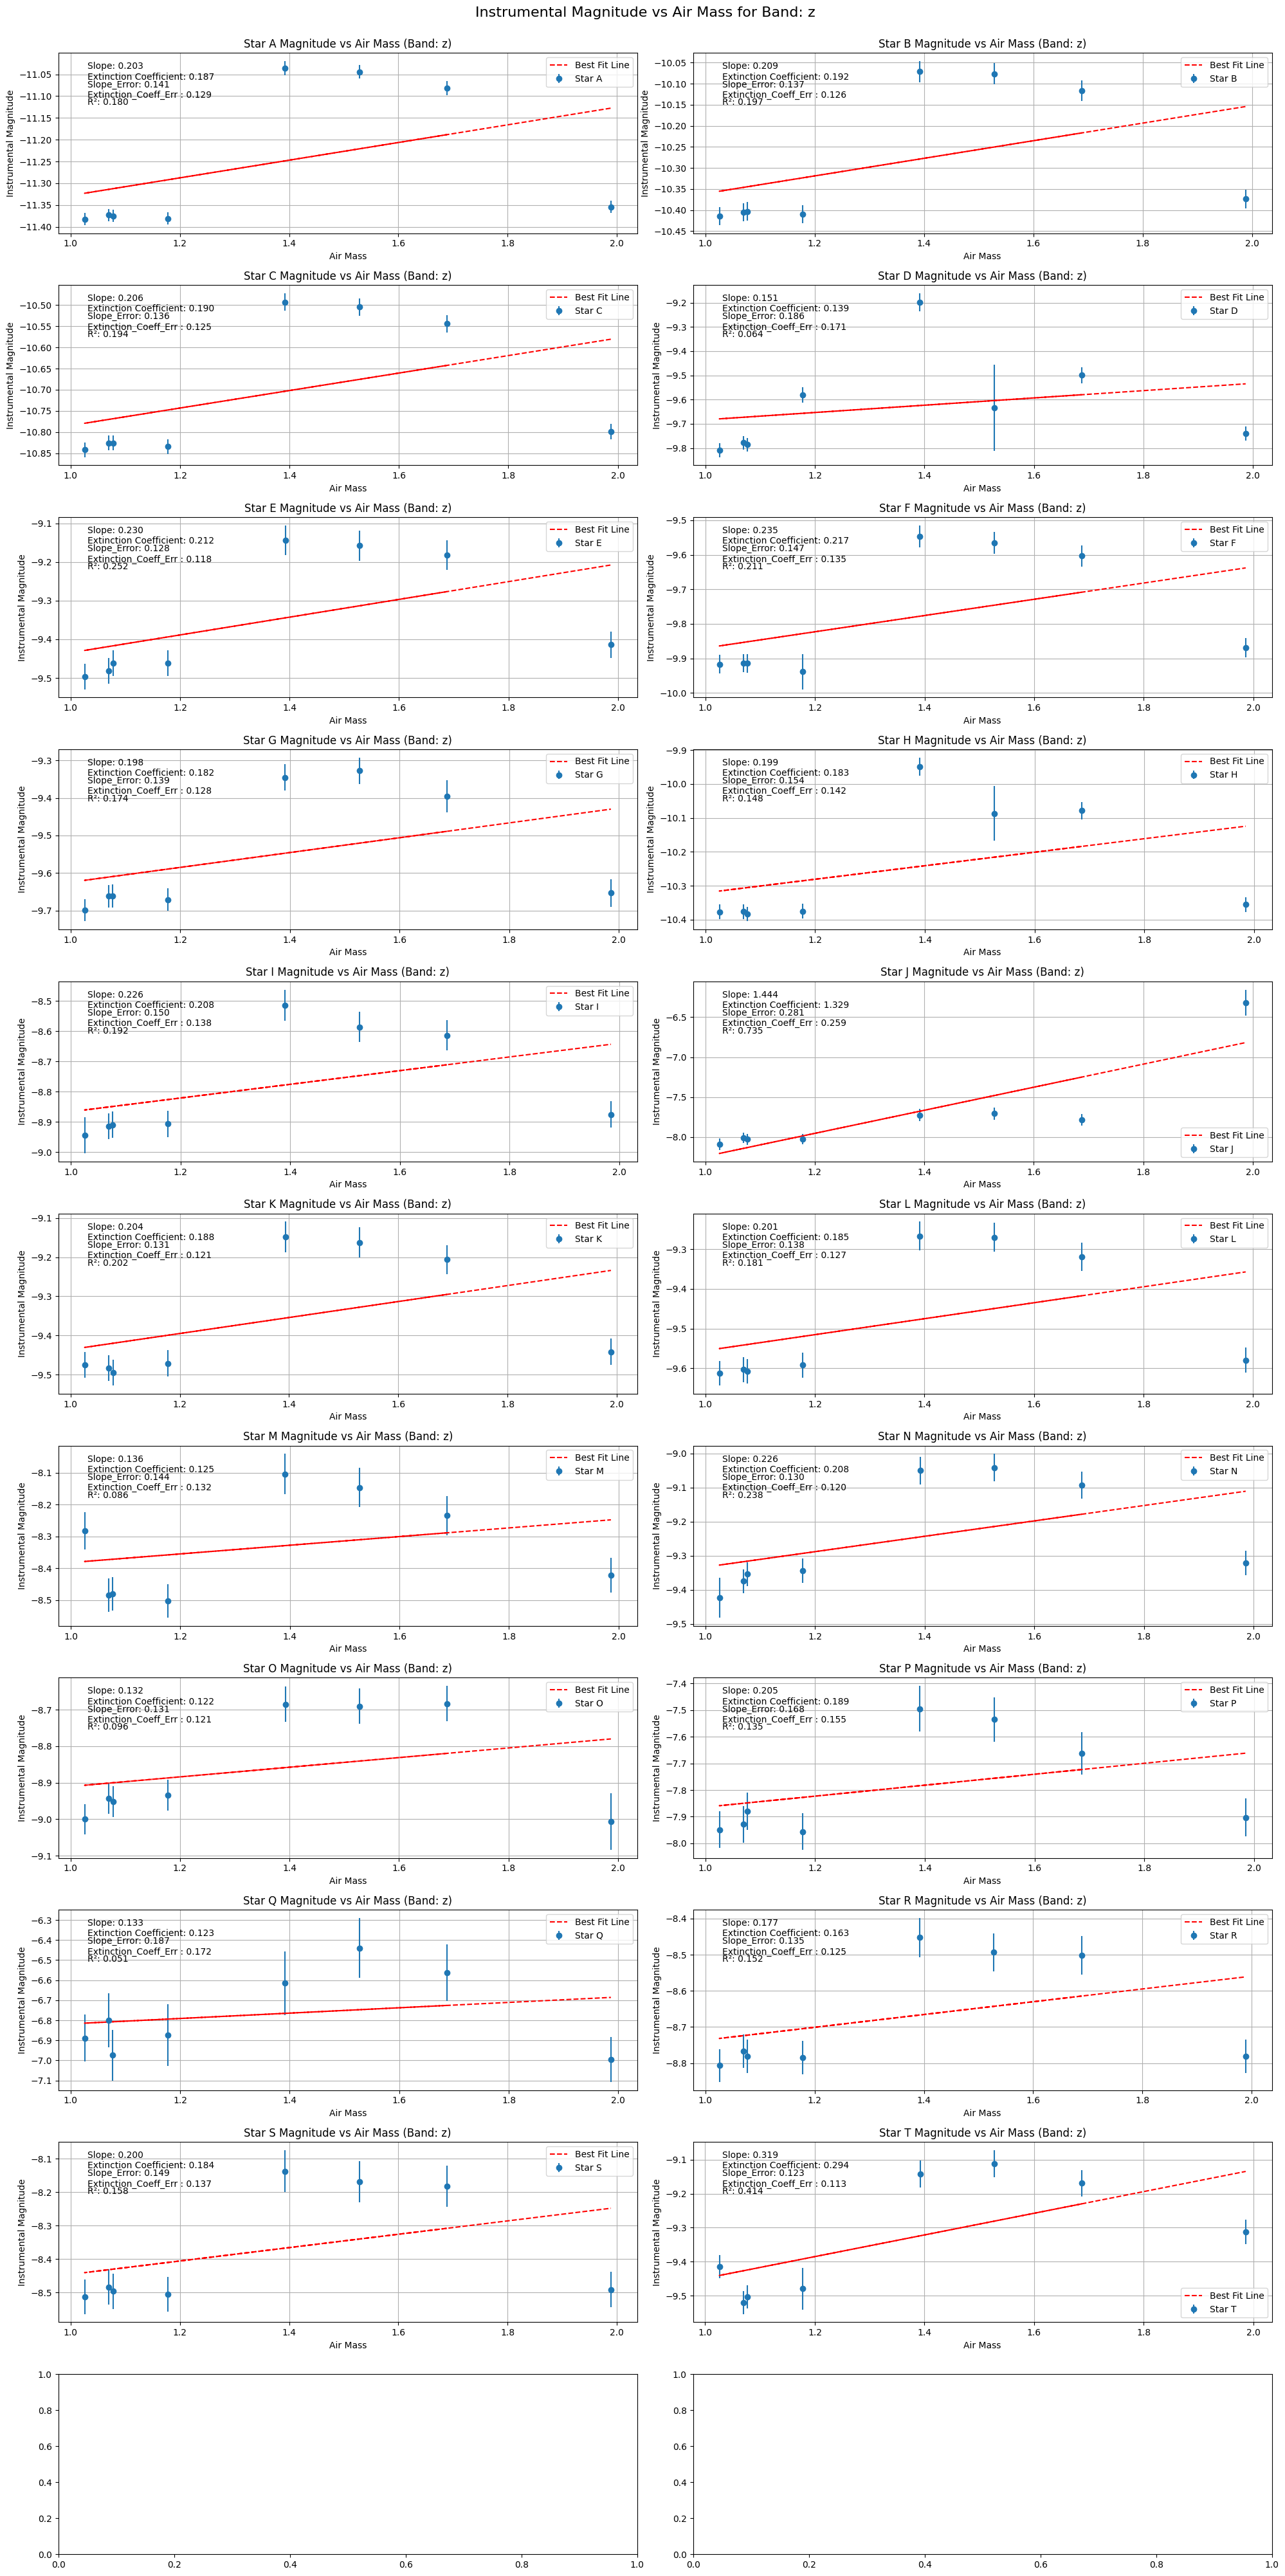

In [178]:
Extinction_Coefficients = { 'u': [], 'g': [], 'r': [], 'i': [], 'z': [] }
Extinction_Errs = { 'u': [], 'g': [], 'r': [], 'i': [], 'z': [] }


for Band in ['u','g', 'r', 'i', 'z']:
    fig, axs = plt.subplots(len(stars) // 2 + 1 , 2, figsize=(20,40))
    fig.suptitle(f'Instrumental Magnitude vs Air Mass for Band: {Band}', fontsize=16, y=1)

    for i, star in enumerate(stars):
        m, c, m_err, r_2 = Least_Squares_Fit(np.array(star.air_masses[Band][:]), np.array(star.magnitudes[Band][:]))
        axs[i // 2, i % 2].errorbar(star.air_masses[Band][:], star.magnitudes[Band][:], yerr=star.del_mags[Band][:], fmt='o', label=f'Star {star.star_id}')
        axs[i // 2, i % 2].plot(star.air_masses[Band][:], np.polyval([m, c], star.air_masses[Band][:]), 'r--', label='Best Fit Line')
        axs[i // 2, i % 2].set_xlabel('Air Mass')
        axs[i // 2, i % 2].set_ylabel('Instrumental Magnitude')
        # axs[i].invert_yaxis()
        axs[i // 2, i % 2].set_title(f'Star {star.star_id} Magnitude vs Air Mass (Band: {Band})')
        axs[i // 2, i % 2].text(0.05, 0.95, f'Slope: {m:.3f}\nExtinction Coefficient: {m/1.086:.3f}', transform=axs[i // 2, i % 2].transAxes, verticalalignment='top')
        axs[i // 2, i % 2].text(0.05, 0.85, f'Slope_Error: {m_err:.3f}\nExtinction_Coeff_Err : {m_err/1.086:.3f}', transform=axs[i // 2, i % 2].transAxes, verticalalignment='top')
        axs[i // 2, i % 2].text(0.05, 0.75, f'R²: {r_2:.3f}', transform=axs[i // 2, i % 2].transAxes, verticalalignment='top')
        axs[i // 2, i % 2].legend()
        axs[i // 2, i % 2].grid(True)
        Extinction_Coefficients[Band].append(m/1.086)
        Extinction_Errs[Band].append(m_err/1.086)
       
    plt.tight_layout()
    plt.show()


In [179]:
print("Extinction Coefficients:")
for band, coeffs in Extinction_Coefficients.items():
    errs = Extinction_Errs[band]
    variance = np.array([err**2 for err in errs])
    one_over_variance = 1 / variance
    weighted_avg = np.sum(coeffs * one_over_variance) / np.sum(one_over_variance)
    weighted_std = np.sqrt(1 / np.sum(one_over_variance))
    print(f"Band {band}: Average Extinction Coefficient = {weighted_avg:.4f}, Std Dev = {weighted_std:.4f}")


Extinction Coefficients:
Band u: Average Extinction Coefficient = 0.6149, Std Dev = 0.0299
Band g: Average Extinction Coefficient = 0.2951, Std Dev = 0.0260
Band r: Average Extinction Coefficient = 0.2502, Std Dev = 0.0266
Band i: Average Extinction Coefficient = 0.2246, Std Dev = 0.0275
Band z: Average Extinction Coefficient = 0.2030, Std Dev = 0.0299


In [180]:
'''
---------------------------------------------------------------------------------------------------------------------------------------- IGNORE ---
'''

'\n---------------------------------------------------------------------------------------------------------------------------------------- IGNORE ---\n'

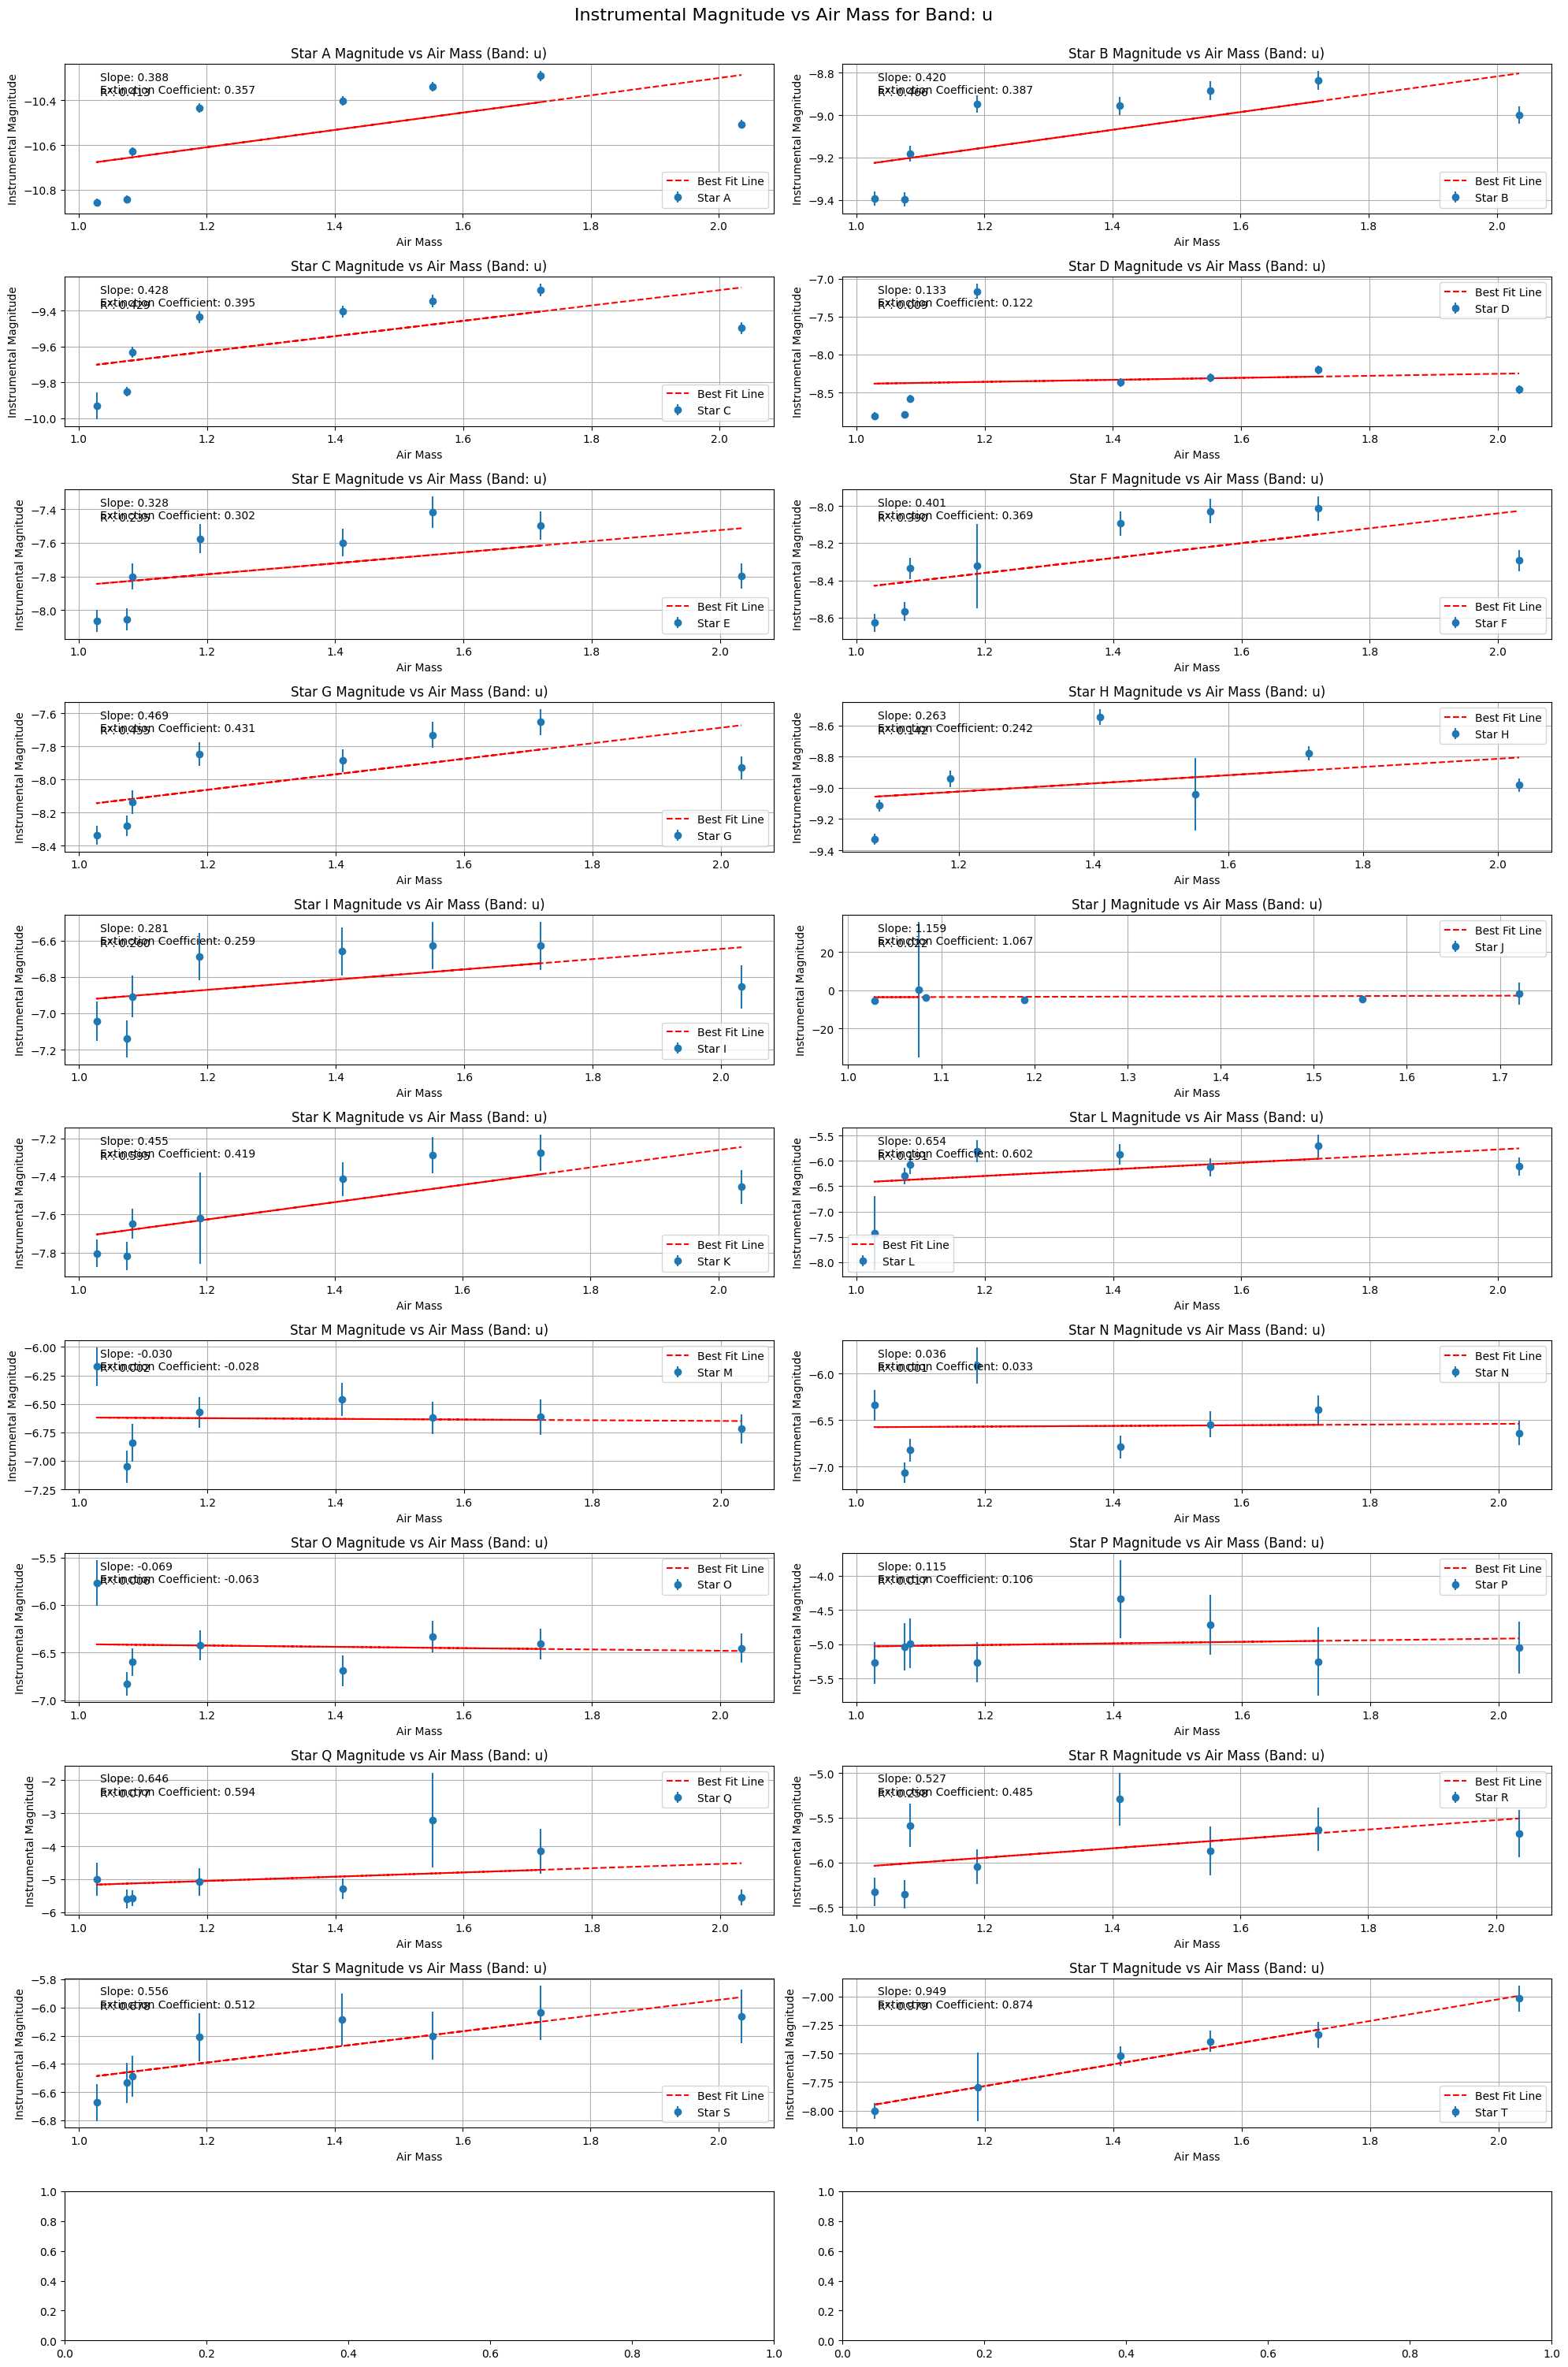

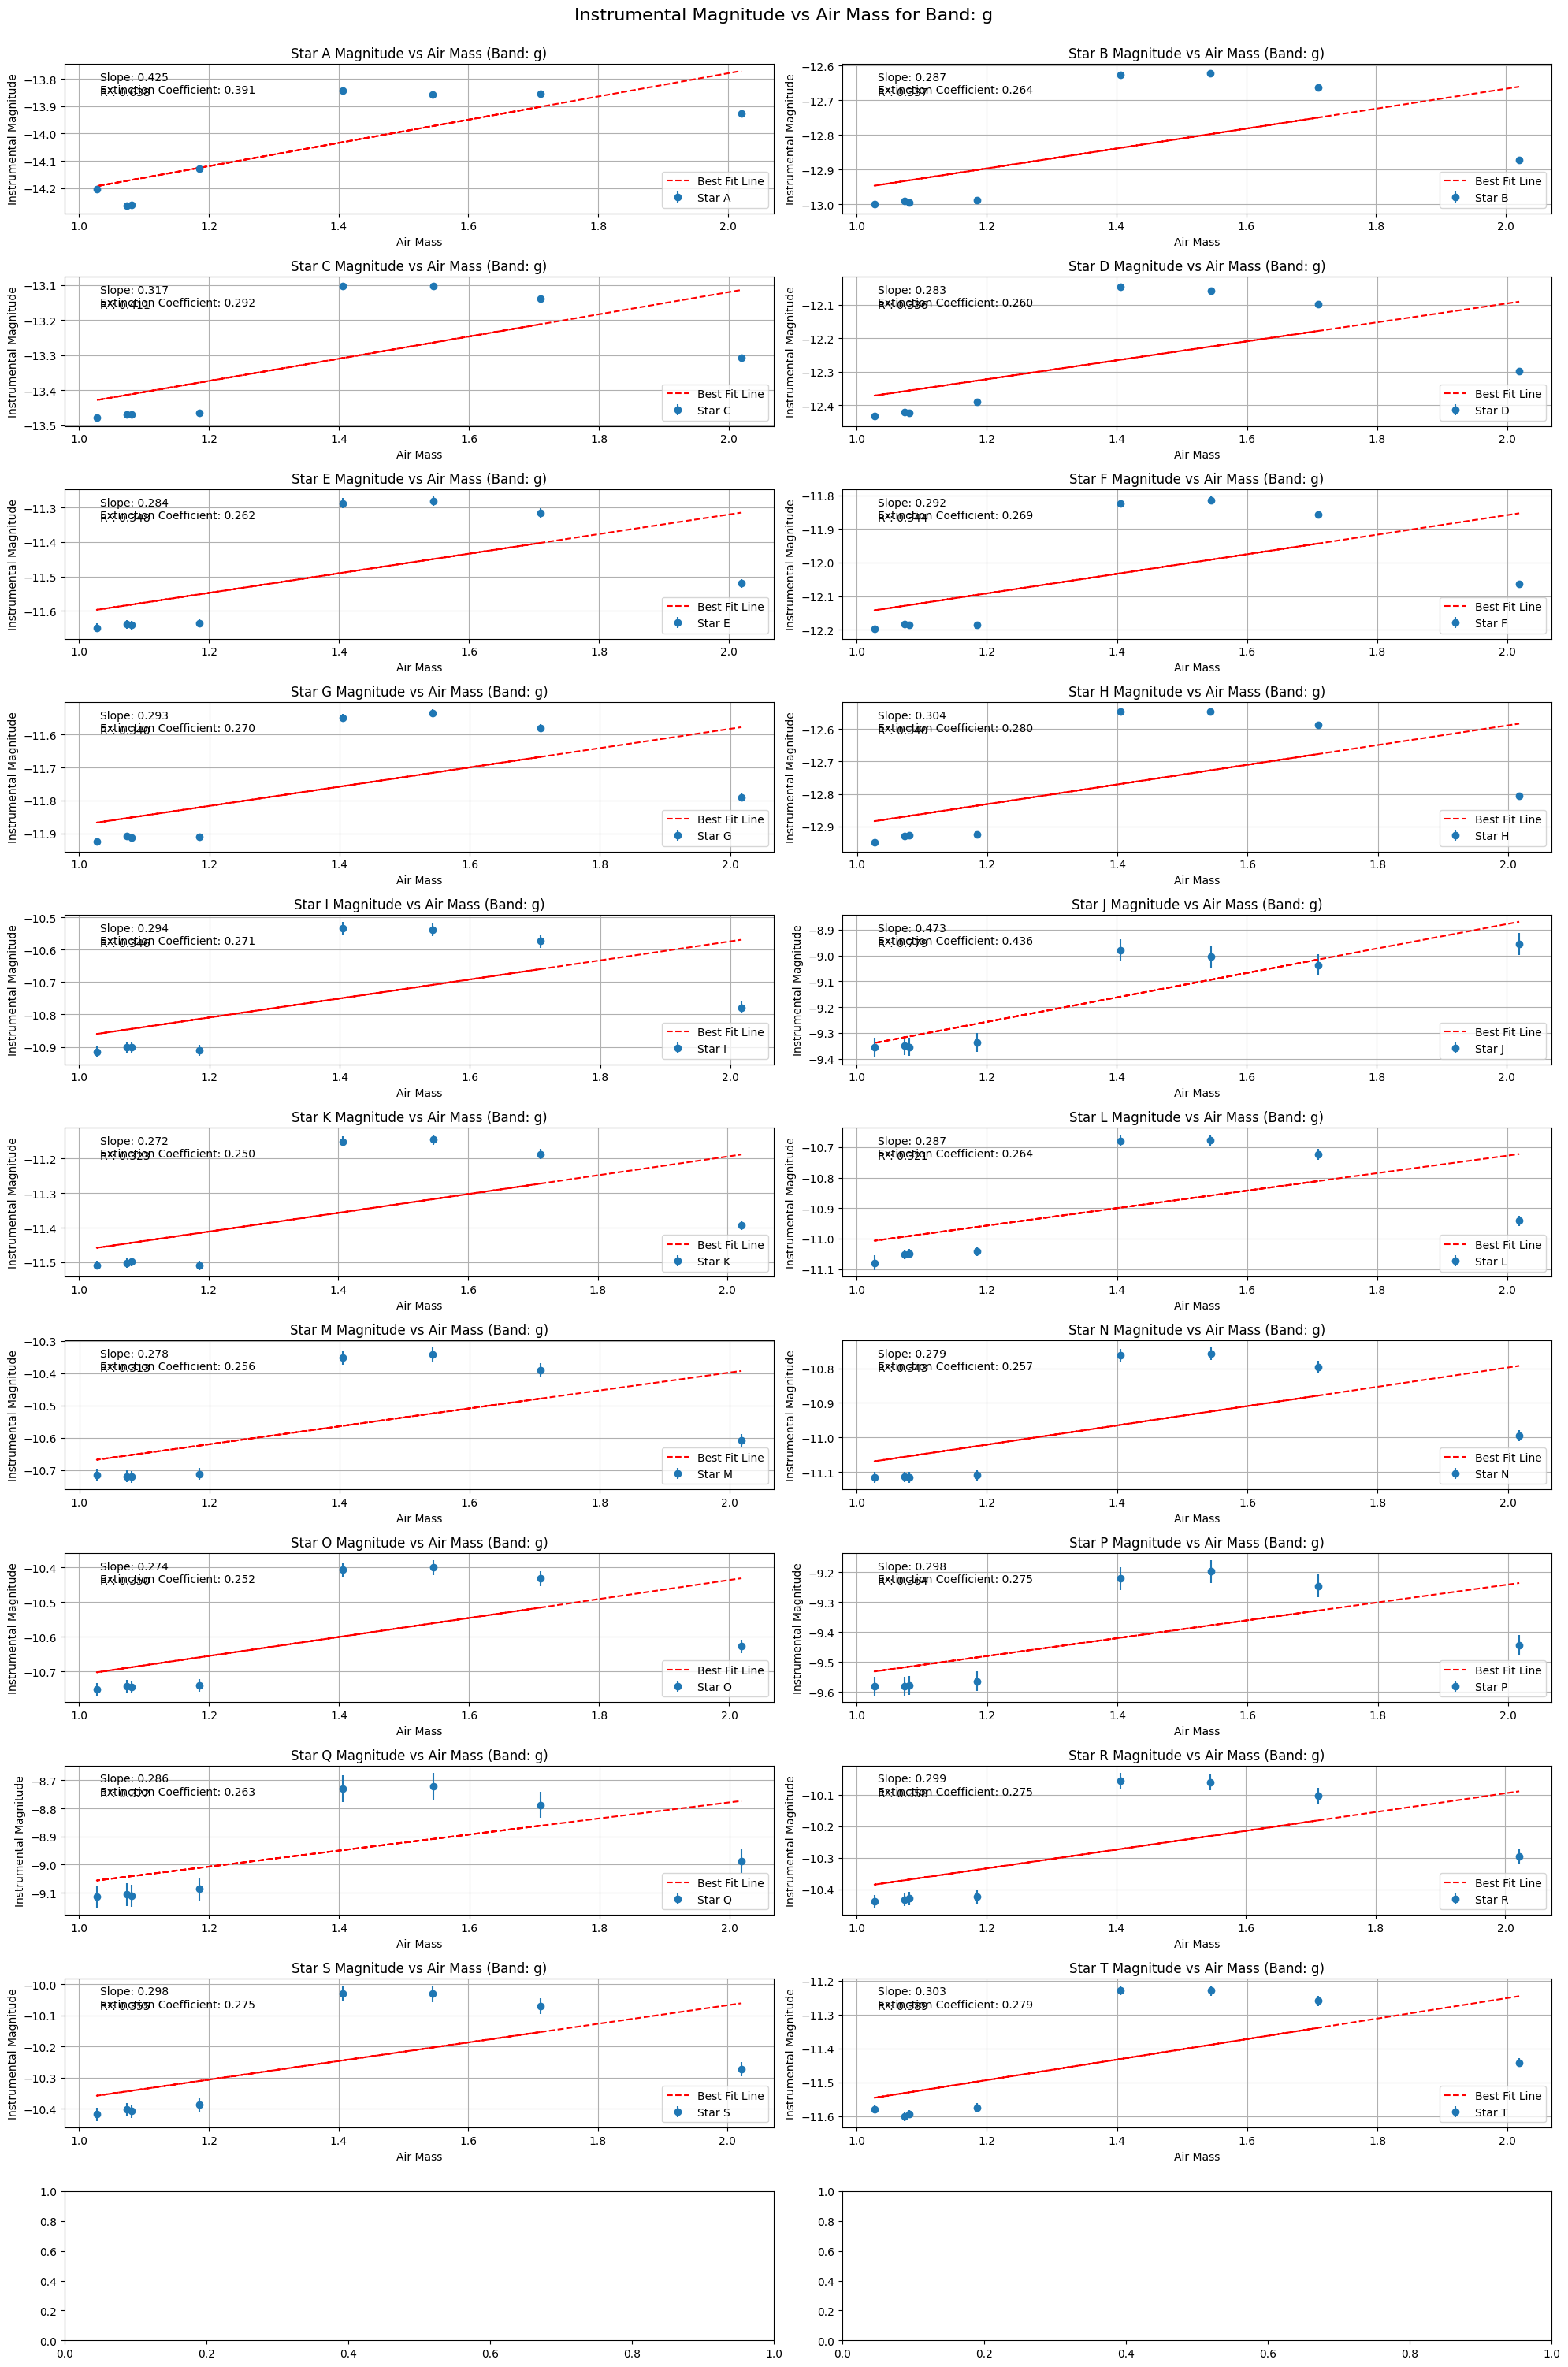

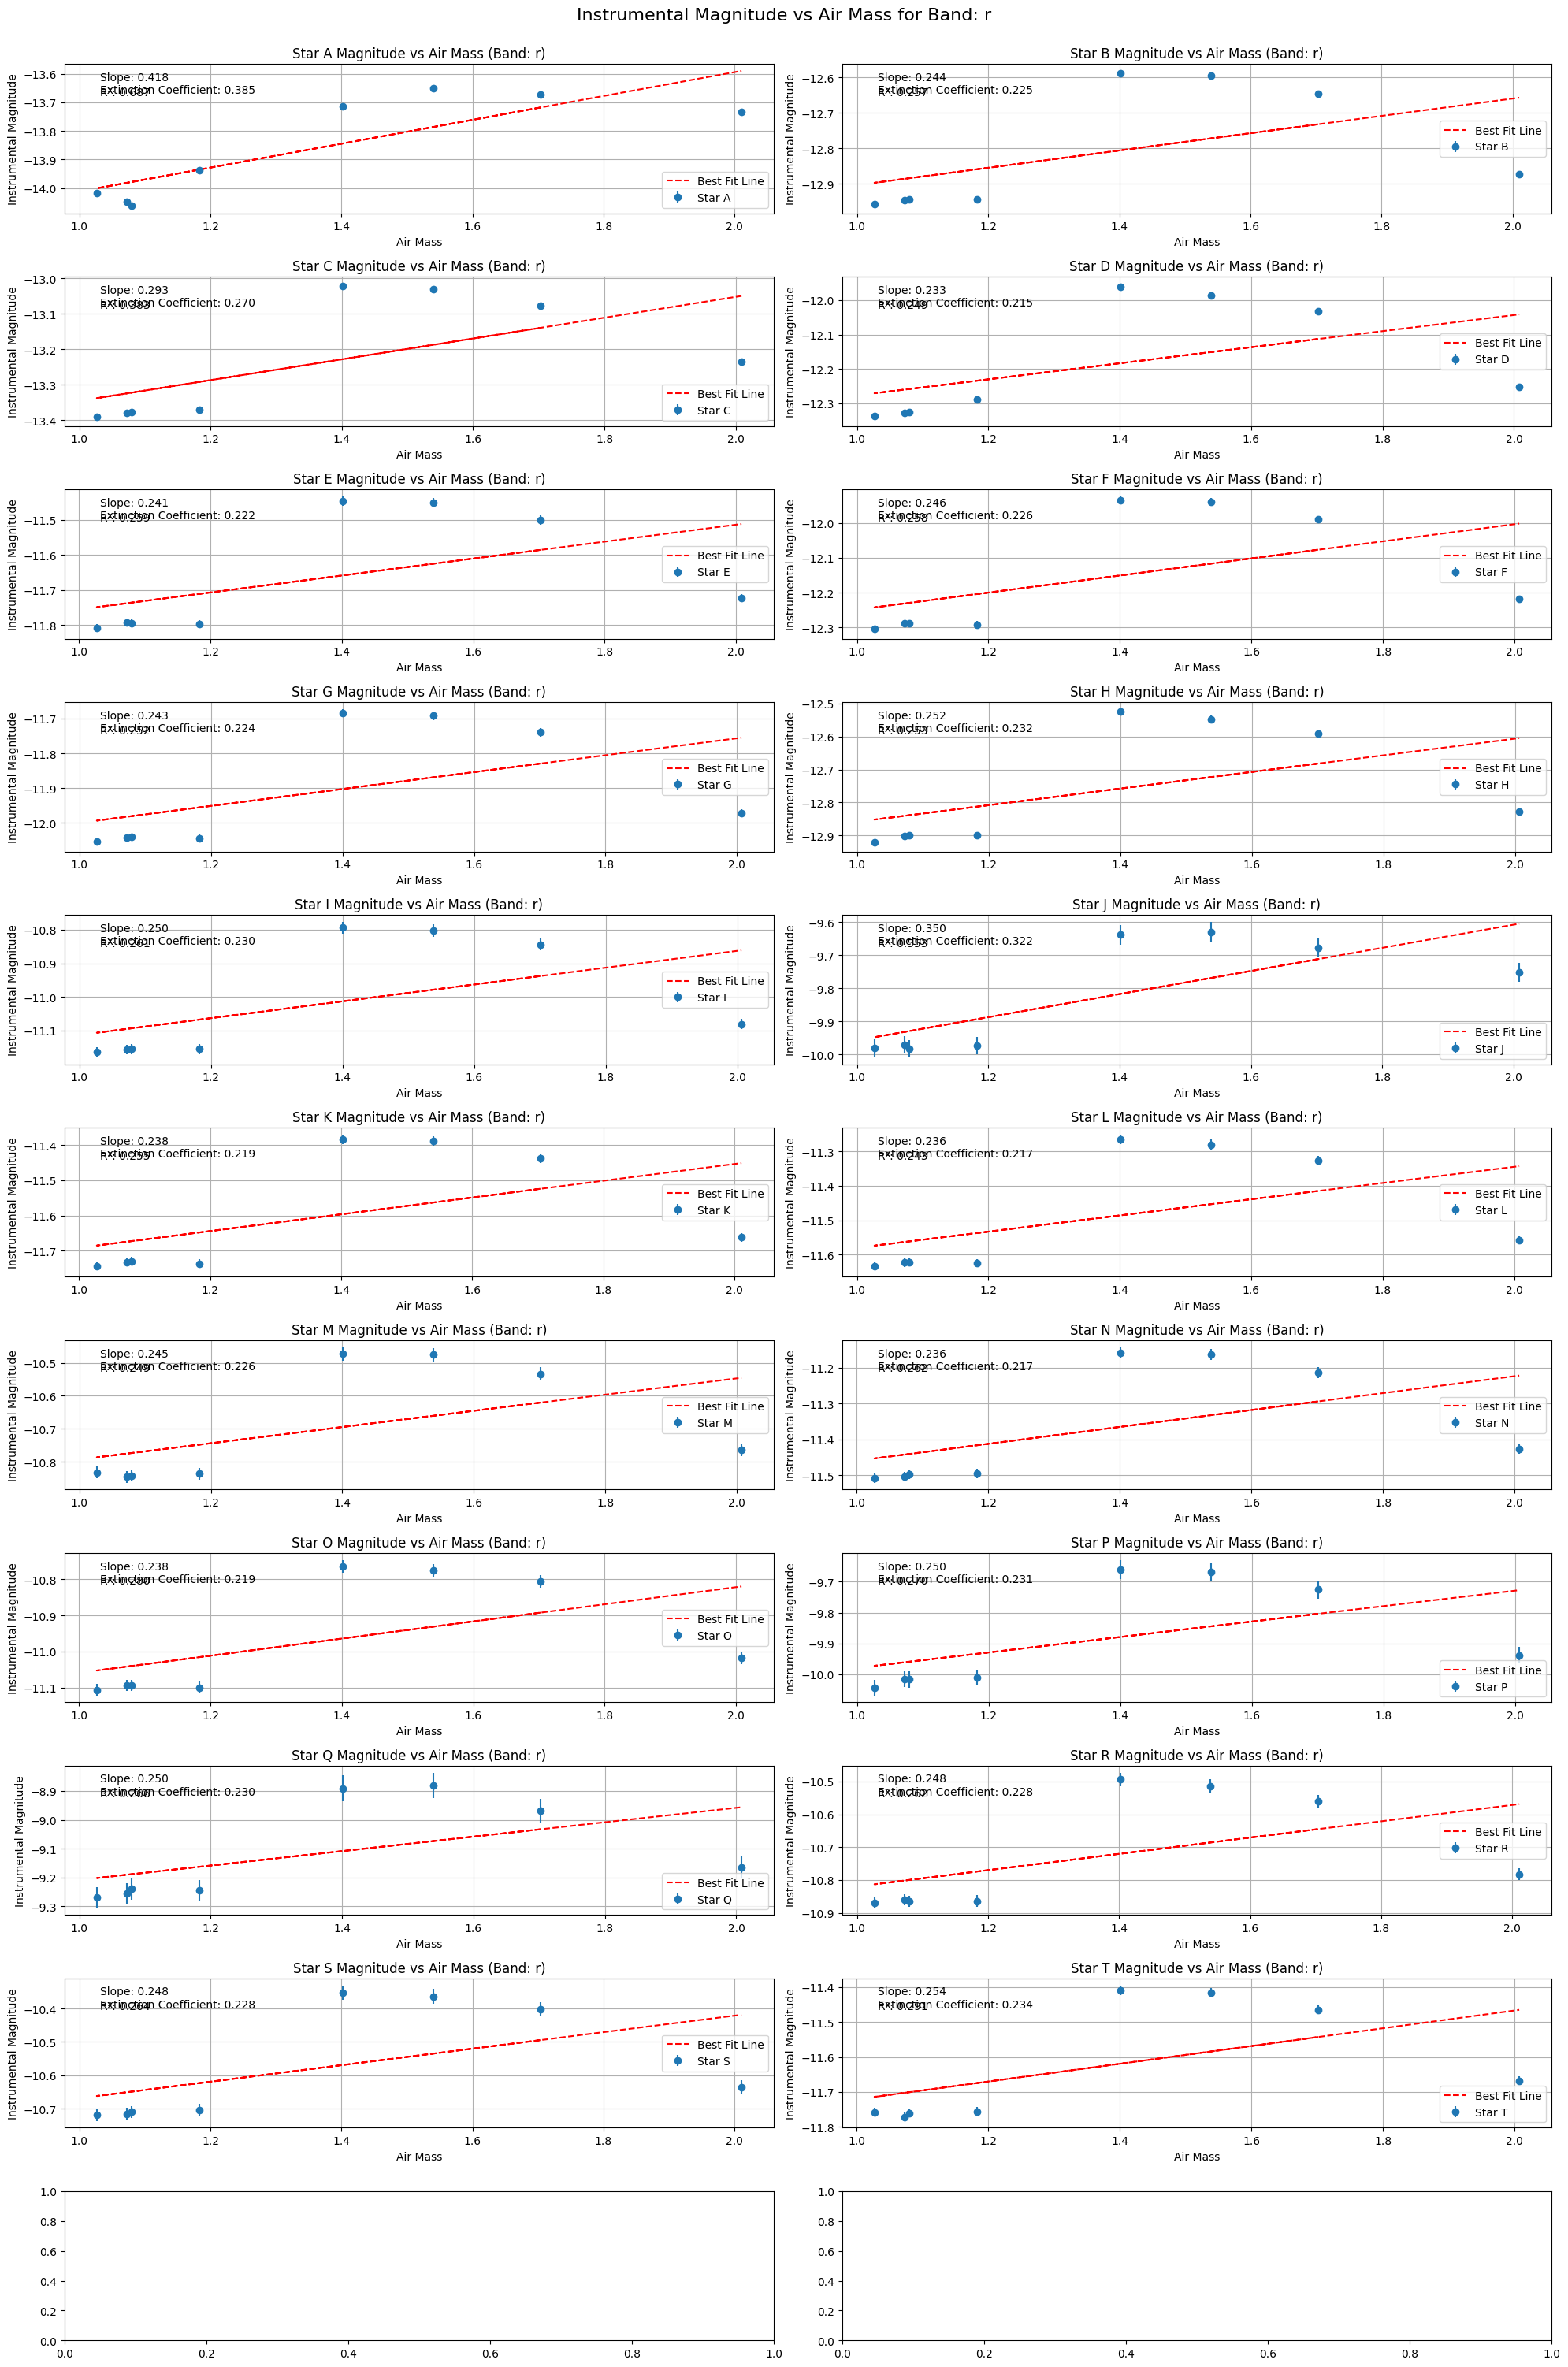

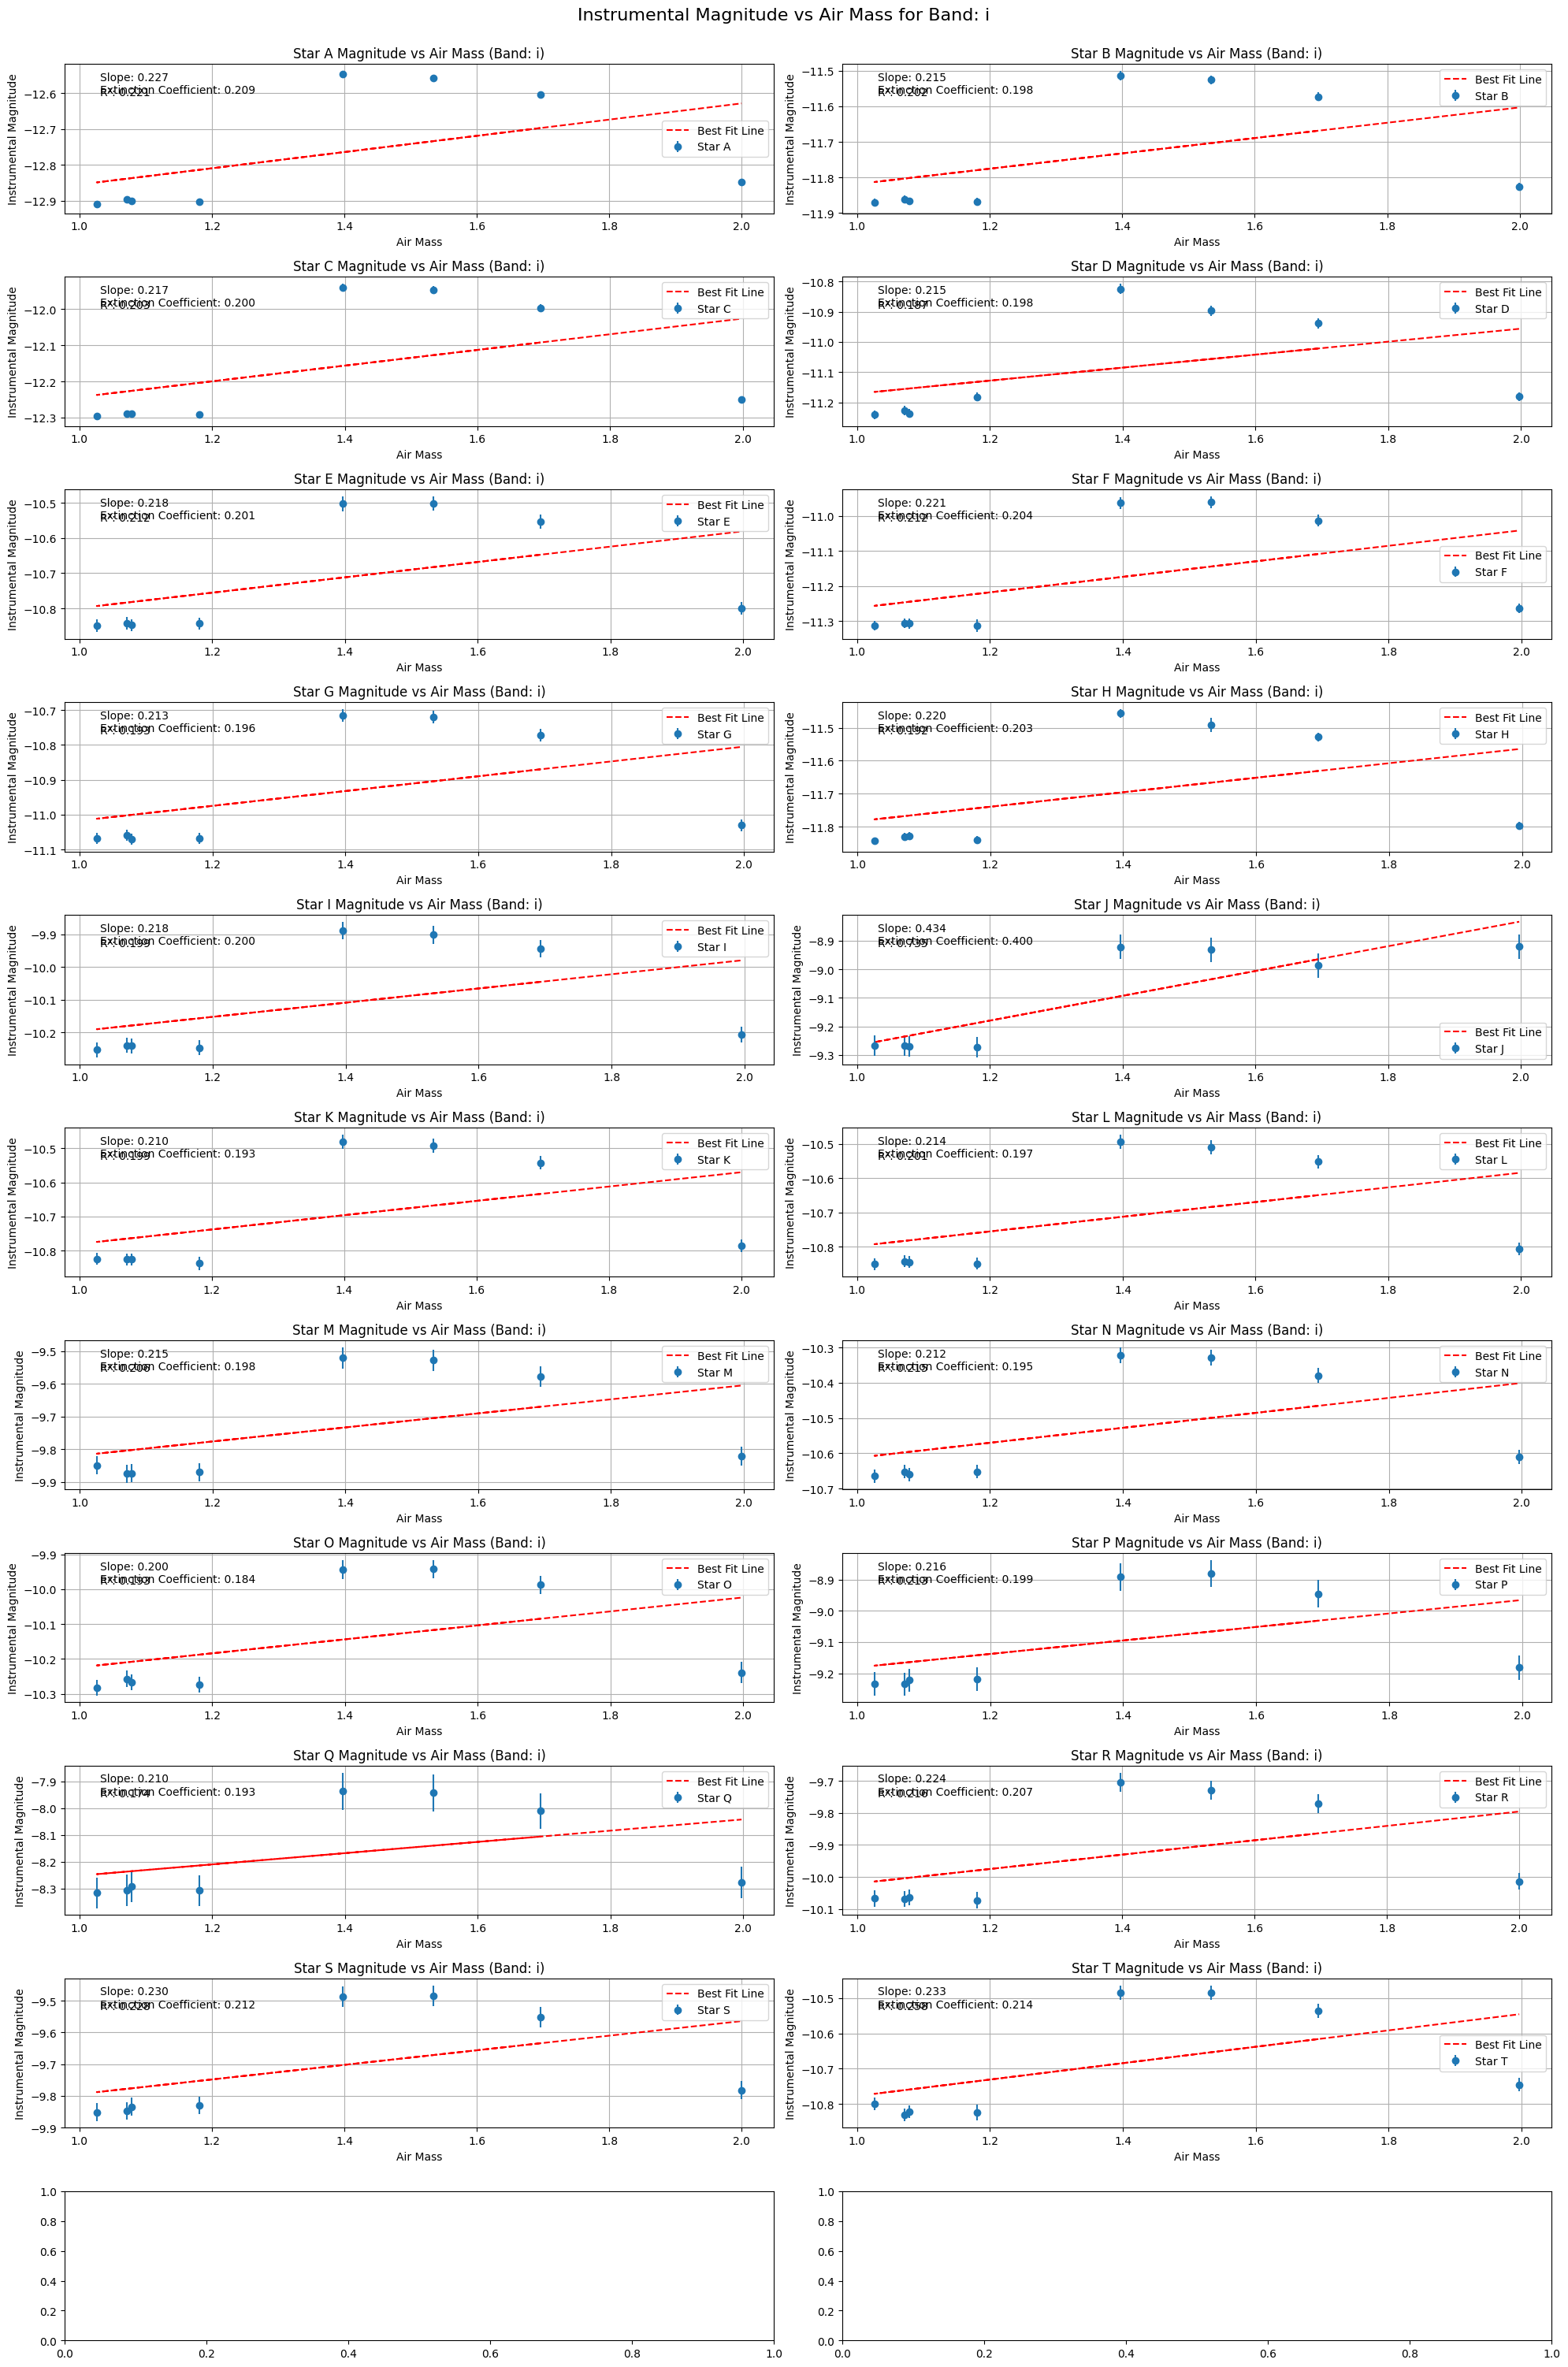

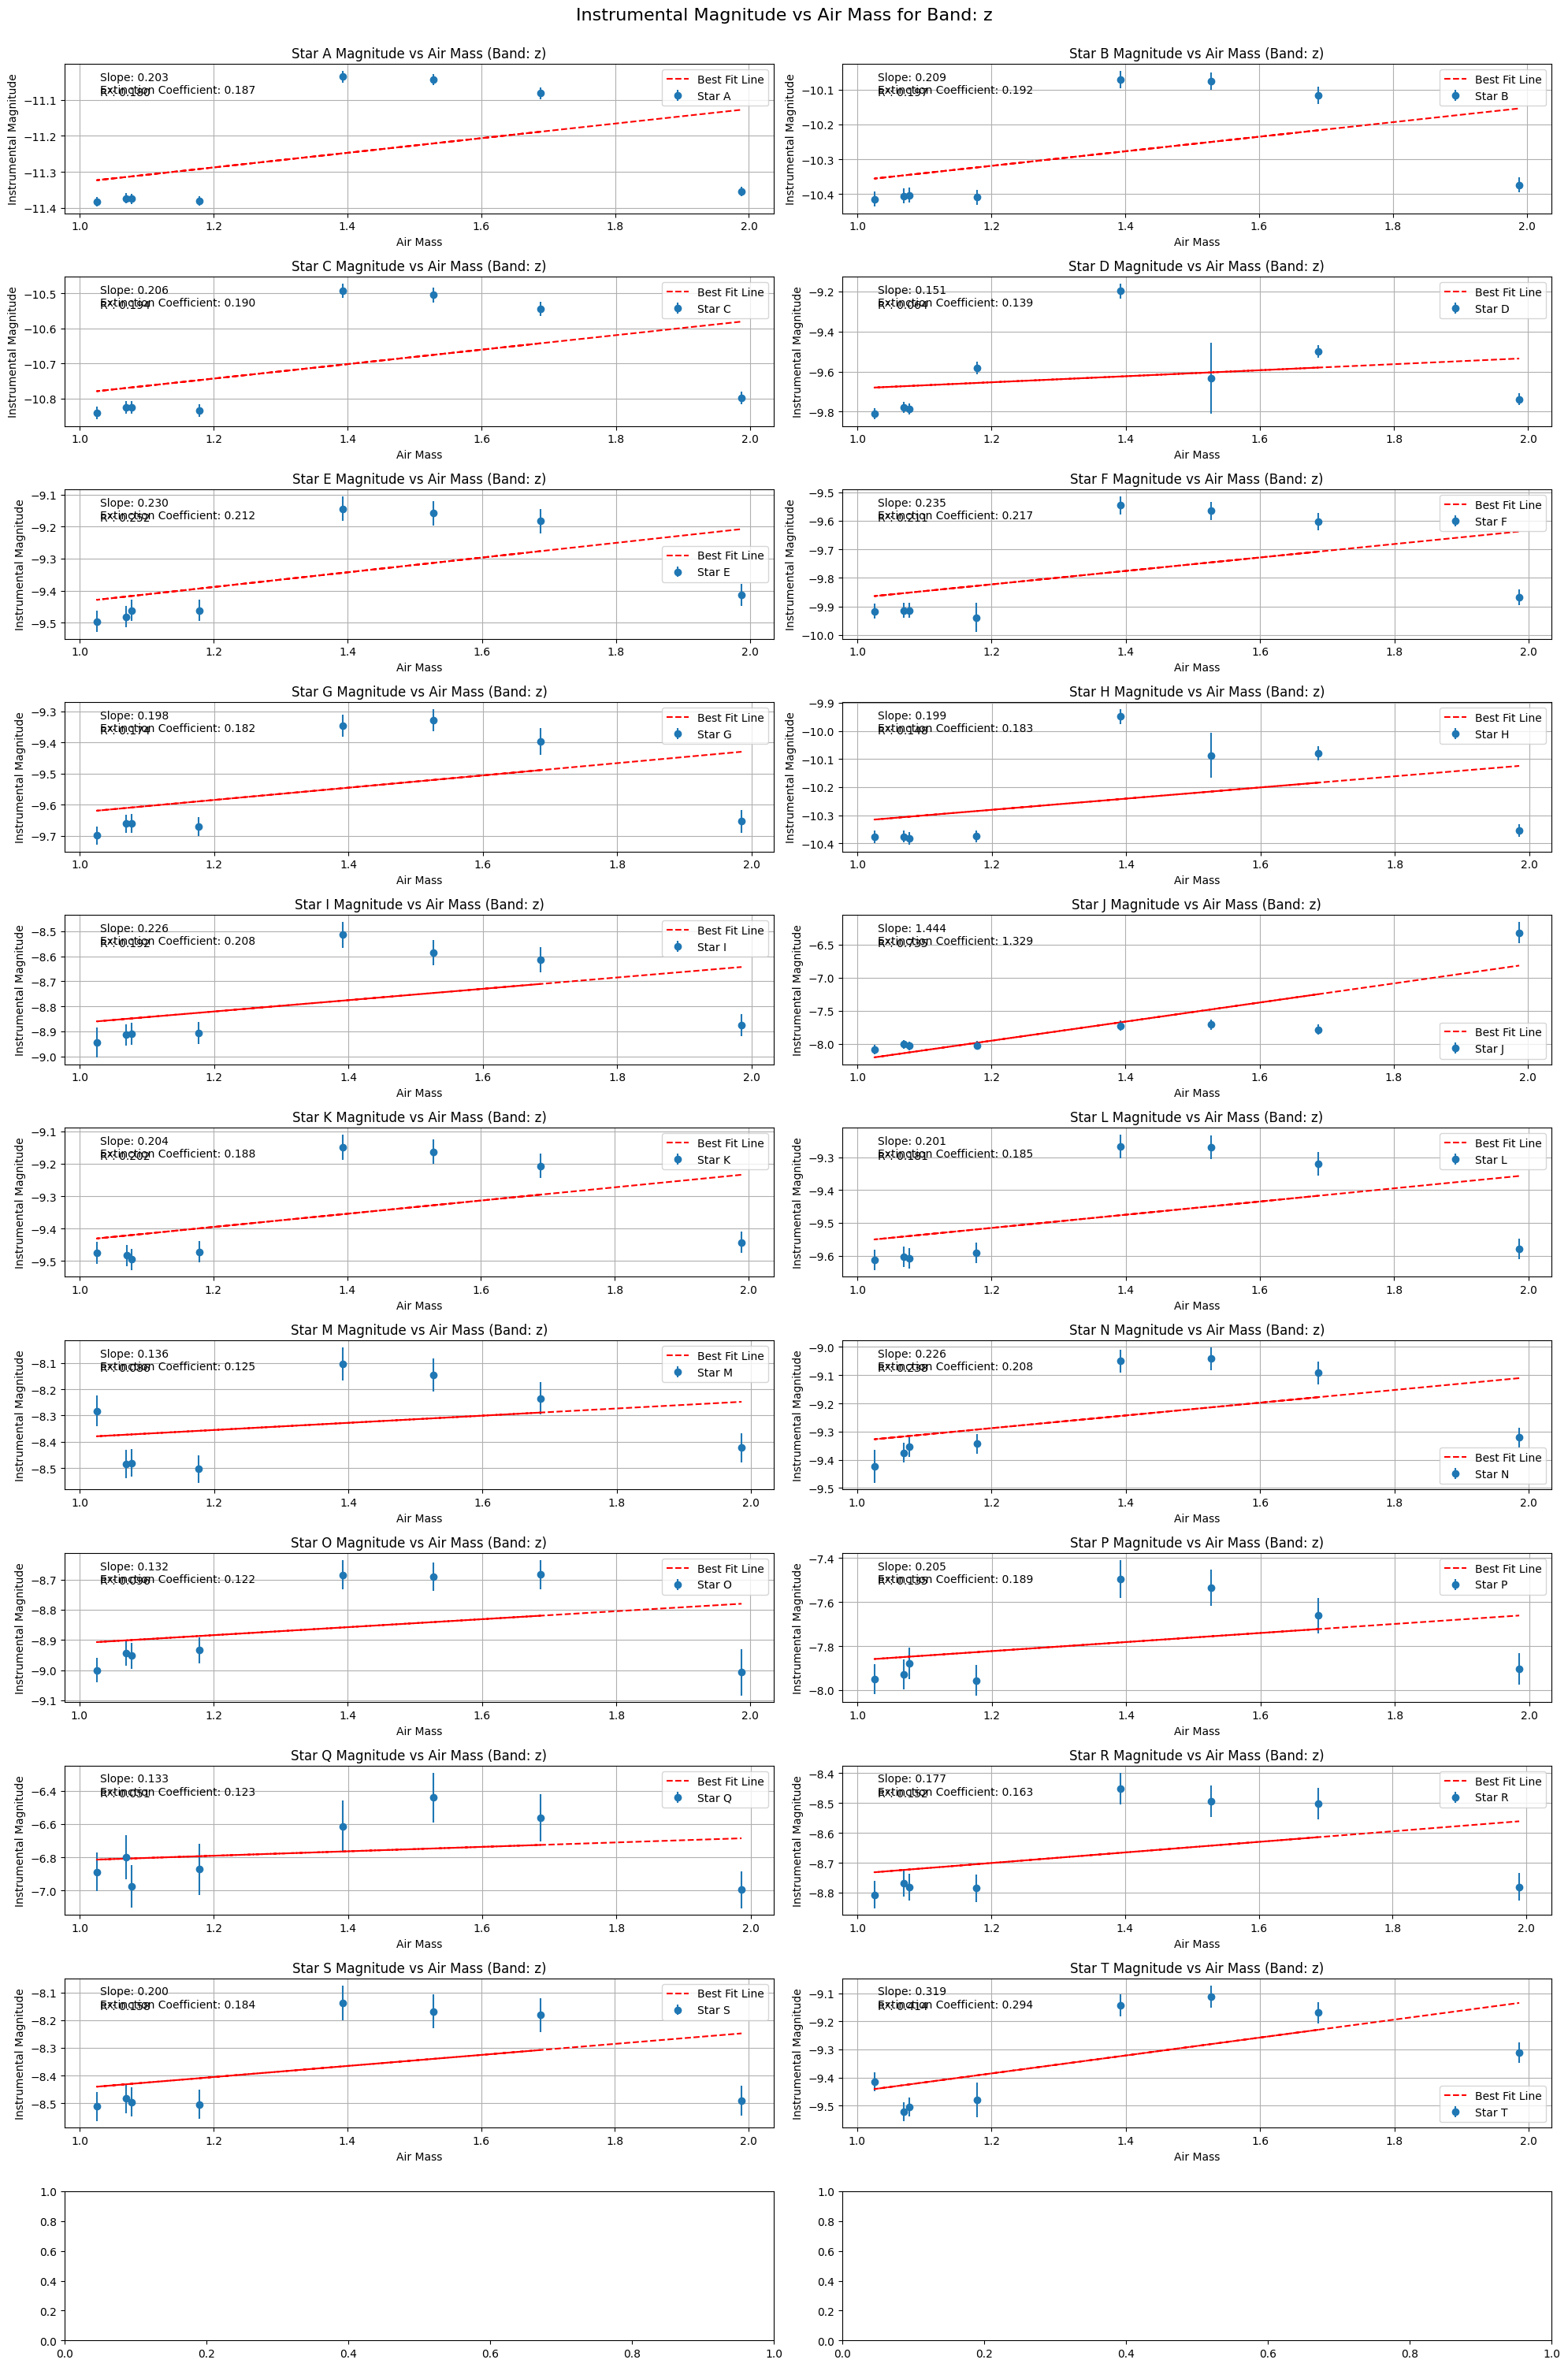

In [181]:
Extinction_Coefficients = { 'u': [], 'g': [], 'r': [], 'i': [], 'z': [] }


for Band in ['u','g', 'r', 'i', 'z']:
    fig, axs = plt.subplots(len(stars) // 2 + 1 , 2, figsize=(20,30))
    fig.suptitle(f'Instrumental Magnitude vs Air Mass for Band: {Band}', fontsize=16, y=1)

    for i, star in enumerate(stars):
        p = np.polyfit(star.air_masses[Band][:], star.magnitudes[Band][:], 1)
        R_2 = np.corrcoef(star.air_masses[Band][:], star.magnitudes[Band][:])[0, 1] ** 2
        axs[i // 2, i % 2].errorbar(star.air_masses[Band][:], star.magnitudes[Band][:], yerr=star.del_mags[Band][:], fmt='o', label=f'Star {star.star_id}')
        axs[i // 2, i % 2].plot(star.air_masses[Band][:], np.polyval(p, star.air_masses[Band][:]), 'r--', label='Best Fit Line')
        axs[i // 2, i % 2].set_xlabel('Air Mass')
        axs[i // 2, i % 2].set_ylabel('Instrumental Magnitude')
        # axs[i].invert_yaxis()
        axs[i // 2, i % 2].set_title(f'Star {star.star_id} Magnitude vs Air Mass (Band: {Band})')
        axs[i // 2, i % 2].text(0.05, 0.95, f'Slope: {p[0]:.3f}\nExtinction Coefficient: {p[0]/1.086:.3f}', transform=axs[i // 2, i % 2].transAxes, verticalalignment='top')
        axs[i // 2, i % 2].text(0.05, 0.85, f'R²: {R_2:.3f}', transform=axs[i // 2, i % 2].transAxes, verticalalignment='top')
        axs[i // 2, i % 2].legend()
        axs[i // 2, i % 2].grid(True)
        Extinction_Coefficients[Band].append(p[0]/1.086)
    plt.tight_layout()
    plt.show()


In [182]:
print("Extinction Coefficients:")
for band, coeffs in Extinction_Coefficients.items():
    avg_coeff = np.mean(coeffs)
    std_coeff = np.std(coeffs)
    print(f"Band {band}: Average Extinction Coefficient = {avg_coeff:.3f}, Std Dev = {std_coeff:.3f}")

Extinction Coefficients:
Band u: Average Extinction Coefficient = 0.373, Std Dev = 0.275
Band g: Average Extinction Coefficient = 0.282, Std Dev = 0.045
Band r: Average Extinction Coefficient = 0.240, Std Dev = 0.041
Band i: Average Extinction Coefficient = 0.210, Std Dev = 0.044
Band z: Average Extinction Coefficient = 0.241, Std Dev = 0.253


In [183]:
#Averaging for an altitude

alt_indices = data['index'].unique()
# print(alt_indices.dtype)

avg_altitudes = {'u' : [], 'g' : [], 'r': [], 'i': [], 'z': []}
avg_fluxes = {'u' : [], 'g' : [], 'r': [], 'i': [], 'z': []}
avg_del_fluxes = {'u' : [], 'g' : [], 'r': [], 'i': [], 'z': []}

for indice in alt_indices:
    altitudes, fluxes, del_fluxes = [], [], []
    band = ''
    for _, row in data.iterrows():
        if row['index'] == indice:
            altitudes.append(float(row['alt_deg']))
            fluxes.append(float(row['flux']))
            del_fluxes.append(float(row['flux_err']))
            band = row['filter']

    avg_altitudes[band].append(np.mean(altitudes))
    avg_fluxes[band].append(np.mean(fluxes))
    avg_del_fluxes[band].append(np.mean(del_fluxes))

print("Average Altitudes:", avg_altitudes)
print("Average Fluxes:", avg_fluxes)
print("Average Delta Fluxes:", avg_del_fluxes)


Average Altitudes: {'u': [35.53823642206213, 40.11001176154988, 45.12268006329435, 57.274174930852304, 67.3981969215793, 76.5844534853632, 68.4009088145165, 29.45576174410797], 'g': [35.802571507290835, 40.35386590470988, 45.36868613485548, 57.53968203714106, 67.65521465802355, 68.65492895884952, 76.77210692714274, 29.69031185202108], 'r': [35.98090823442086, 40.534595593386456, 45.55128343872849, 57.725777571775026, 67.82937590374709, 68.84715212433701, 76.91729100289153, 29.864364842607205], 'i': [36.16232613977217, 40.715406709661366, 45.7369776001337, 57.908767558090815, 68.00610746870954, 69.02174777522531, 77.04576685793674, 30.041462202126326], 'z': [36.346829583770806, 40.89931378482533, 45.92272458740152, 58.094749088563034, 68.18249440286415, 69.19593761585575, 77.18445089113627, 30.218703197087724]}
Average Fluxes: {'u': [1733.049152867926, 1853.8399654134719, 1987.5144034410241, 1938.039221505745, 2444.845431256853, 2823.2587394785155, 2975.698913874512, 2205.706545008753],

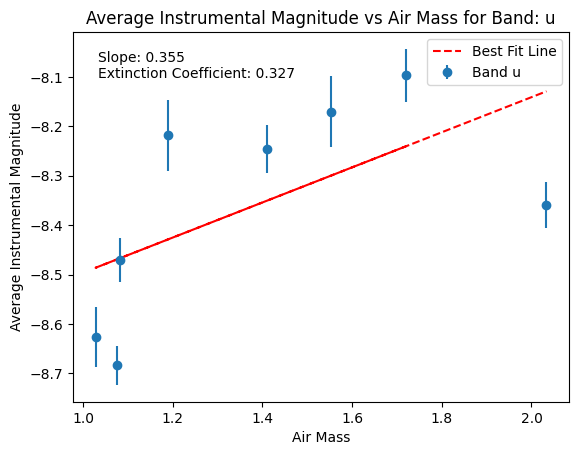

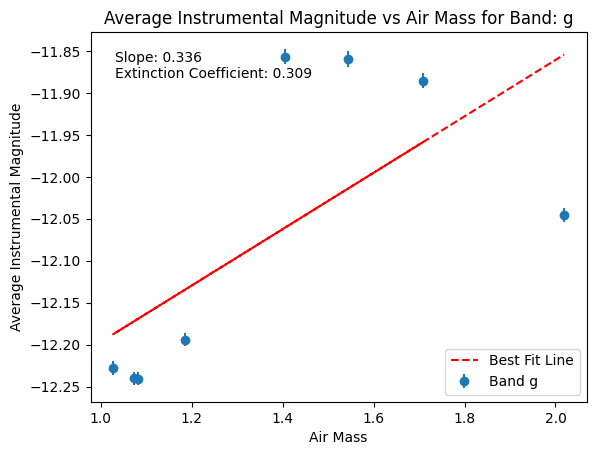

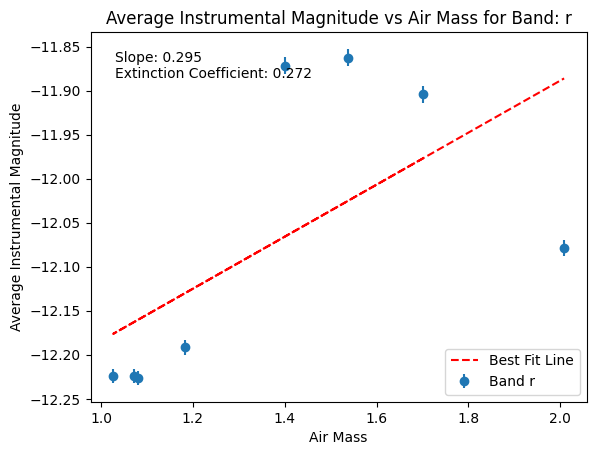

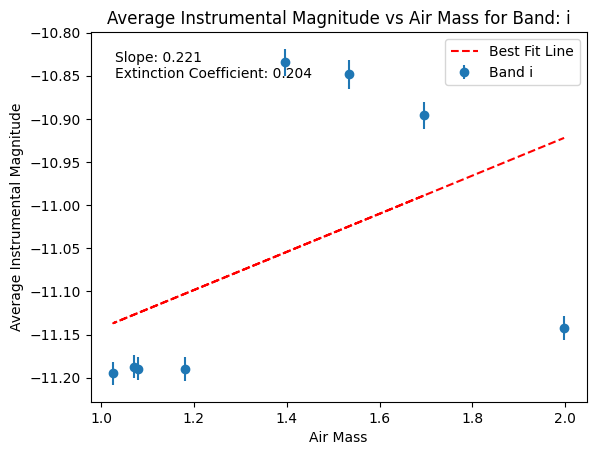

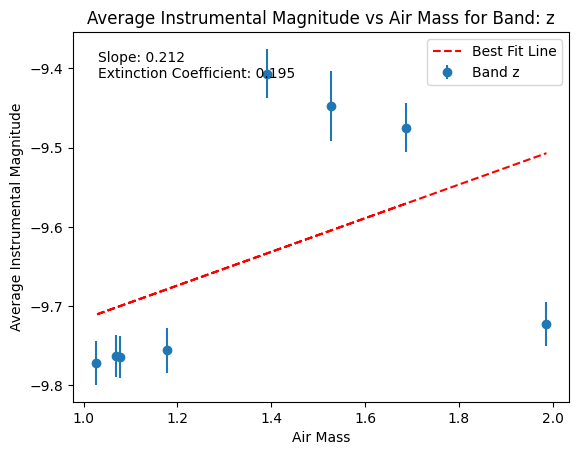

Extinction Coefficients from Averages:
Band u: Average Extinction Coefficient = 0.327
Band g: Average Extinction Coefficient = 0.309
Band r: Average Extinction Coefficient = 0.272
Band i: Average Extinction Coefficient = 0.204
Band z: Average Extinction Coefficient = 0.195


In [184]:
Avg_mag, Avg_mag_err, Avg_airmass = { 'u': [], 'g' : [], 'r': [], 'i': [], 'z': []}, { 'u': [], 'g' : [], 'r': [], 'i': [], 'z': []}, { 'u': [], 'g' : [], 'r': [], 'i': [], 'z': []}
for band in ['u', 'g', 'r', 'i', 'z']:
    for flux, del_flux, alt in zip(avg_fluxes[band], avg_del_fluxes[band], avg_altitudes[band]):
        mag = -2.5 * np.log10(flux)
        mag_err = 1.0857 * (del_flux / flux)
        airmass = 1/np.sin(np.radians(alt))
        Avg_mag[band].append(mag)
        Avg_mag_err[band].append(mag_err)
        Avg_airmass[band].append(airmass)

Extinction_Coefficients_Avg = {'u': [], 'g': [], 'r': [], 'i': [], 'z': [] }
Err_Extinction_Coefficients_Avg = { 'u': [], 'g': [], 'r': [], 'i': [], 'z': [] }

for band in ['u', 'g', 'r', 'i', 'z']:
    plt.errorbar(Avg_airmass[band], Avg_mag[band], yerr=Avg_mag_err[band], fmt='o', label=f'Band {band}')
    p = np.polyfit(Avg_airmass[band], Avg_mag[band], 1)
    plt.plot(Avg_airmass[band], np.polyval(p, Avg_airmass[band]), 'r--', label='Best Fit Line')
    plt.xlabel('Air Mass')
    plt.ylabel('Average Instrumental Magnitude')
    plt.title(f'Average Instrumental Magnitude vs Air Mass for Band: {band}')
    # plt.gca().invert_yaxis()
    plt.text(0.05, 0.95, f'Slope: {p[0]:.3f}\nExtinction Coefficient: {p[0]/1.086:.3f}', transform=plt.gca().transAxes, verticalalignment='top')
    plt.legend()
    plt.show()
    Extinction_Coefficients_Avg[band].append(p[0]/1.086)

print("Extinction Coefficients from Averages:")
for band, coeffs in Extinction_Coefficients_Avg.items():
    avg_coeff = np.mean(coeffs)
    print(f"Band {band}: Average Extinction Coefficient = {avg_coeff:.3f}")